# ------------------------------------------ PREMODELLING ------------------------------------------

## IMPORT LIBRARIES & DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style()

In [2]:
loan = pd.read_csv('cleandata_loan_test4.csv')

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

In [4]:
df = loan.copy()

In [5]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_length_month,flag_bad_loan,issued_year
0,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,MI,22.87,0.0,1986-10-01,0.0,48.0,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,21251.04,17031.10,4219.94,0.0,0.0,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,53.0,0.0,0.0,114834.0,59900.0,25.0,0,2013
1,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CA,25.12,0.0,2007-01-01,0.0,48.0,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,7994.83,6039.04,1955.79,0.0,0.0,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,53.0,0.0,0.0,14123.0,15100.0,25.0,0,2013
2,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CT,14.05,0.0,1994-03-01,1.0,43.0,0.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,8842.80,7733.38,1109.42,0.0,0.0,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,48.0,0.0,0.0,267646.0,61100.0,25.0,0,2013
3,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,13359.77,11999.99,1359.78,0.0,0.0,0.0,2015-09-01,119.17,2015-09-01,2016-01-01,0.0,53.0,0.0,15386.0,13605.0,8100.0,21.0,0,2013
4,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,FL,16.51,0.0,1998-03-01,0.0,34.0,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,11431.20,9550.73,1880.47,0.0,0.0,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,34.0,0.0,1514.0,272492.0,15400.0,25.0,0,2013


In [5]:
df = df.drop(columns='loan_status')

# 4. PREMODELLING

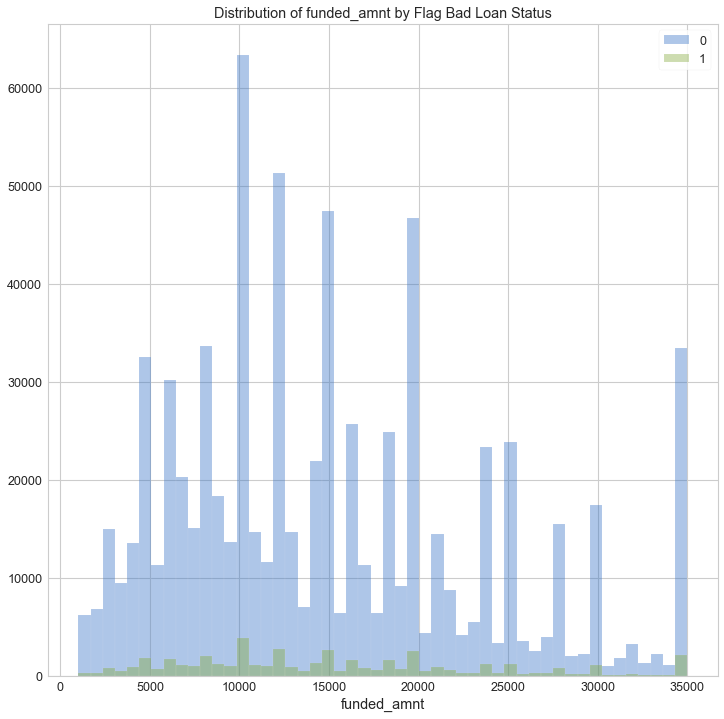

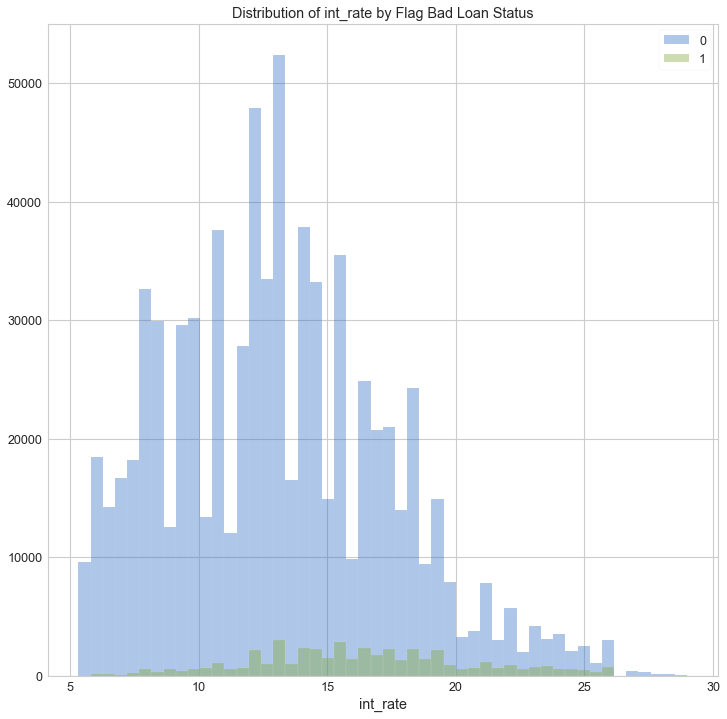

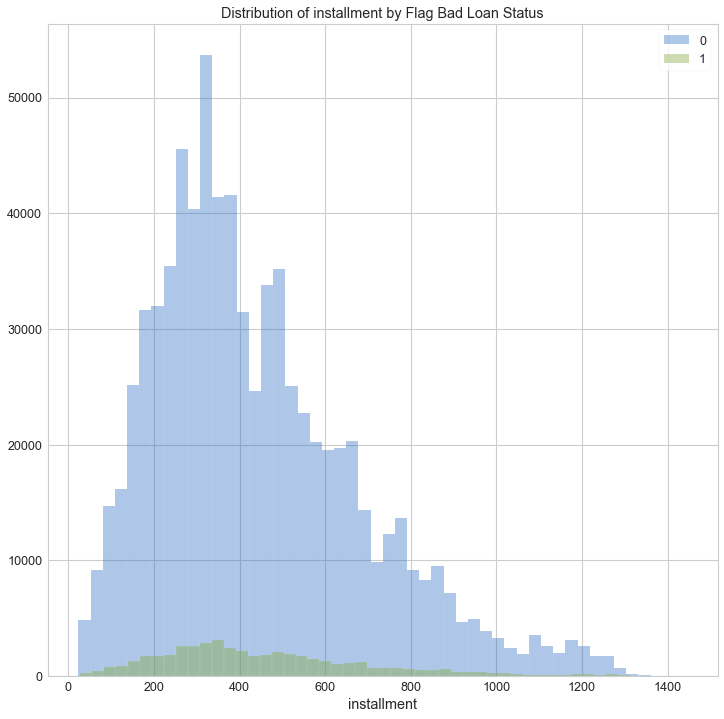

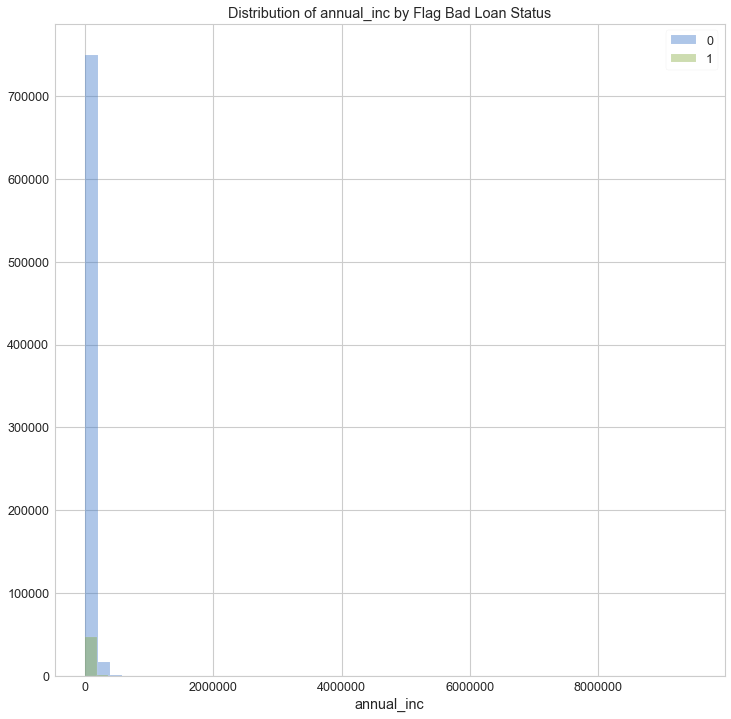

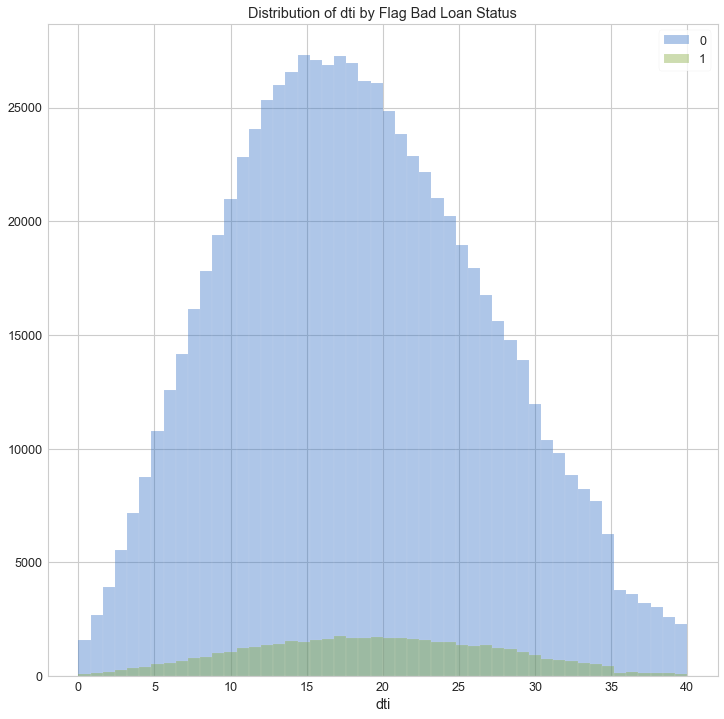

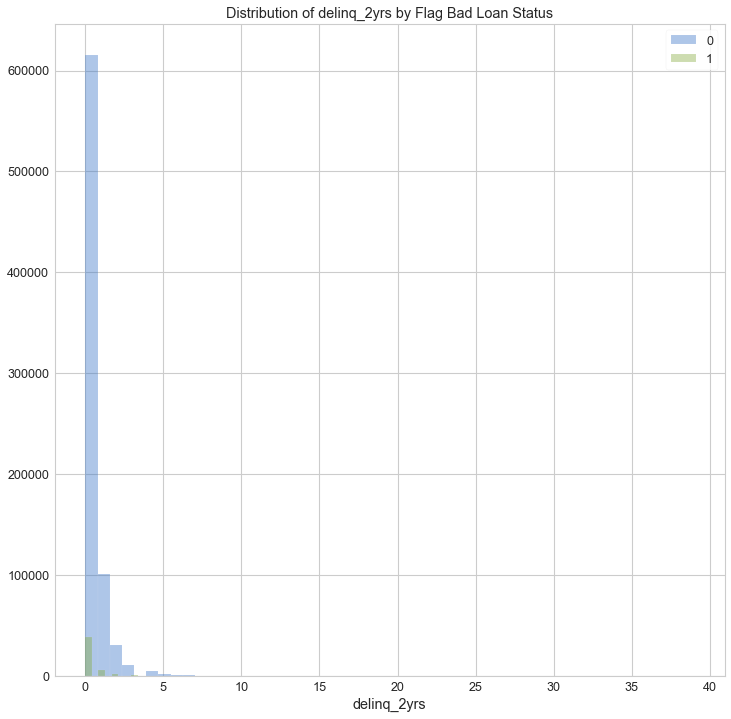

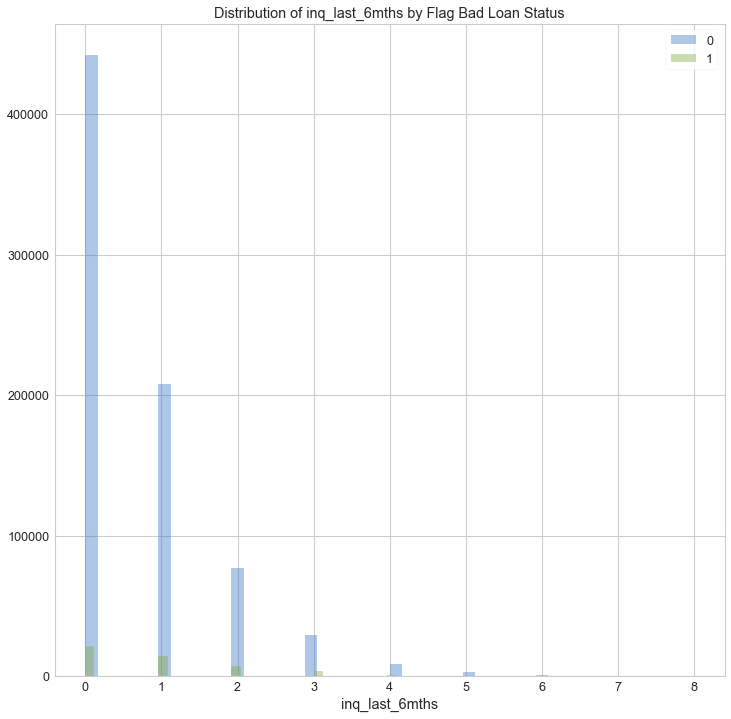

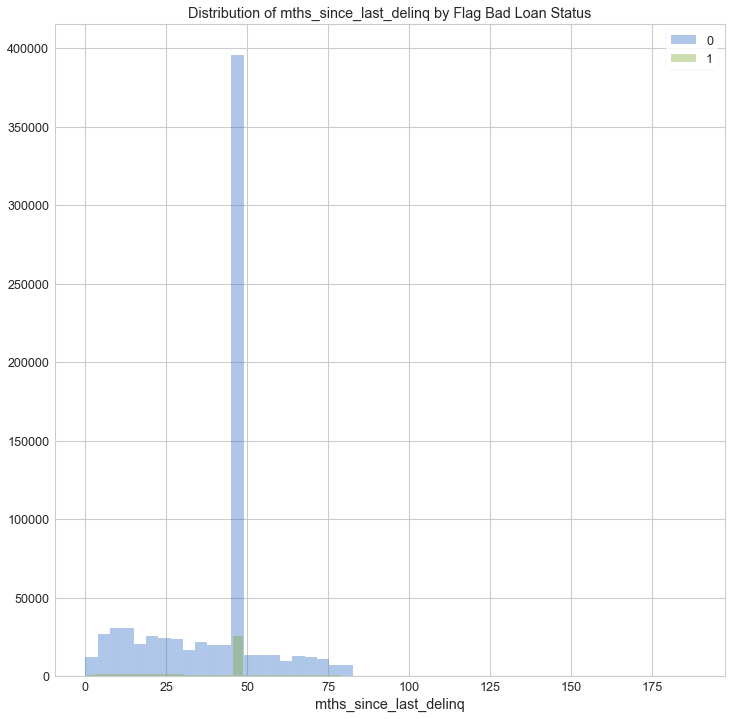

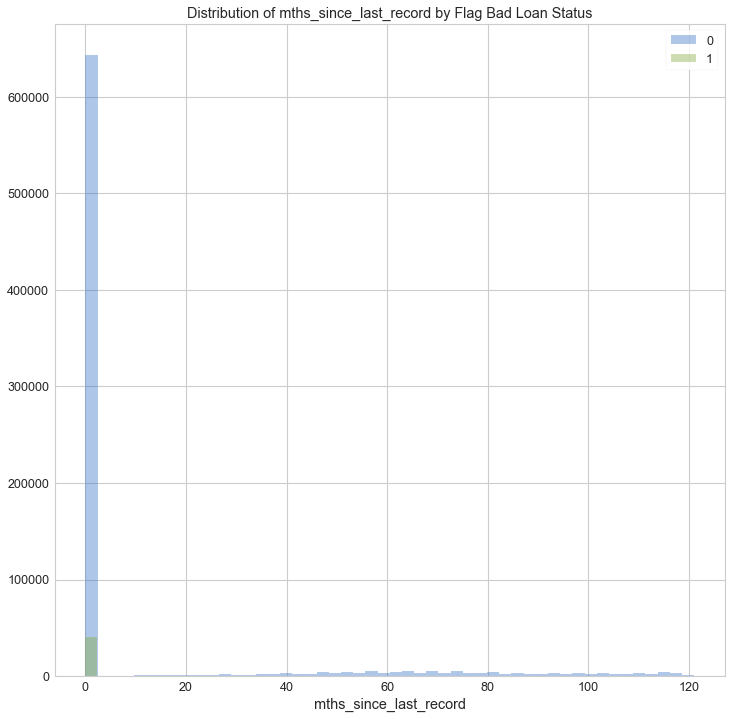

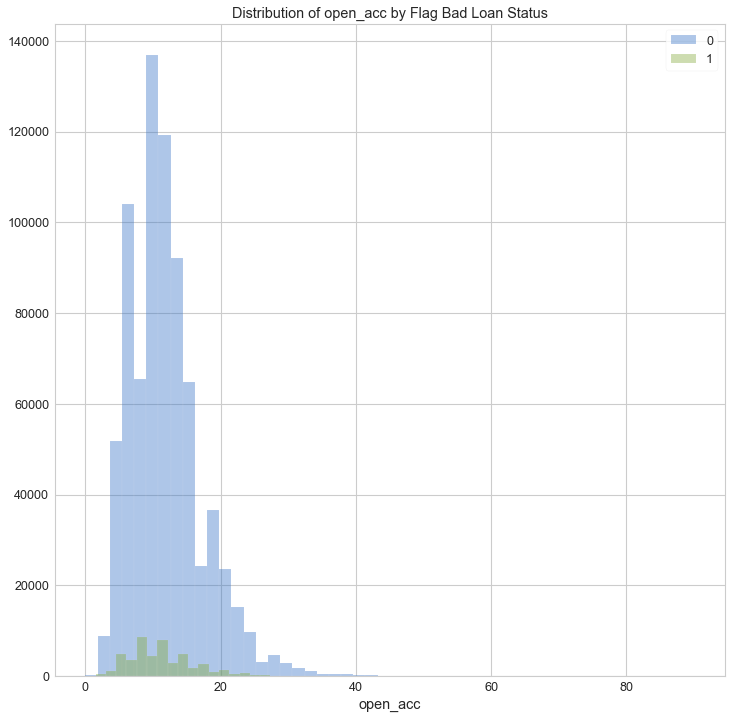

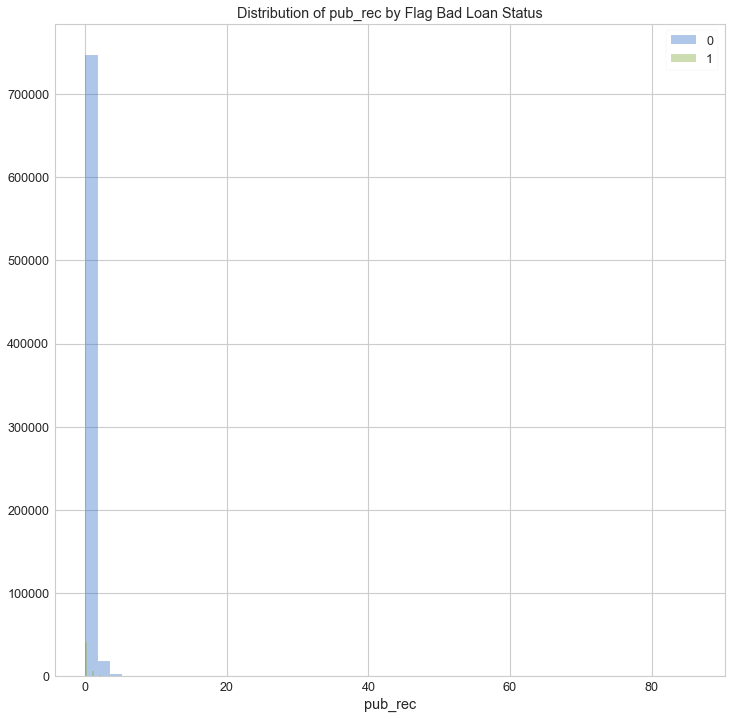

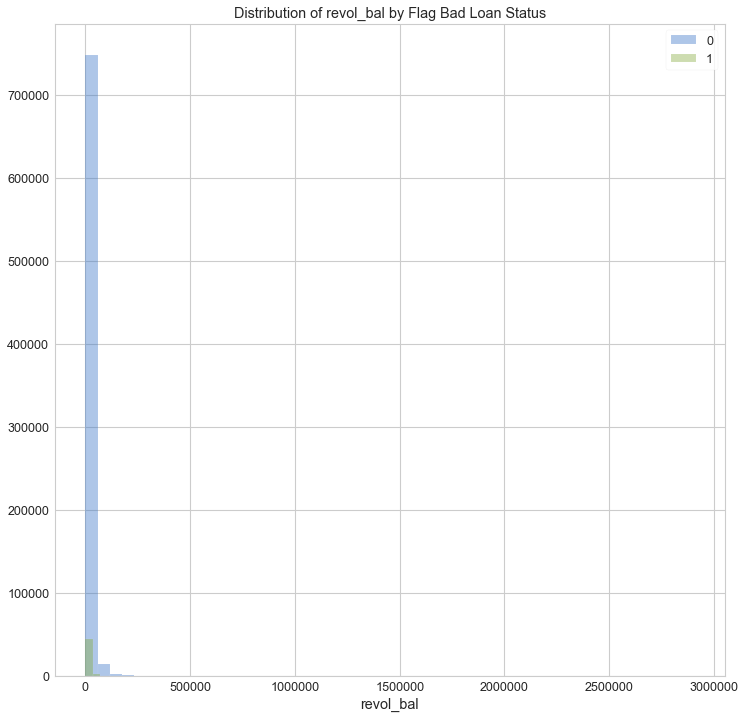

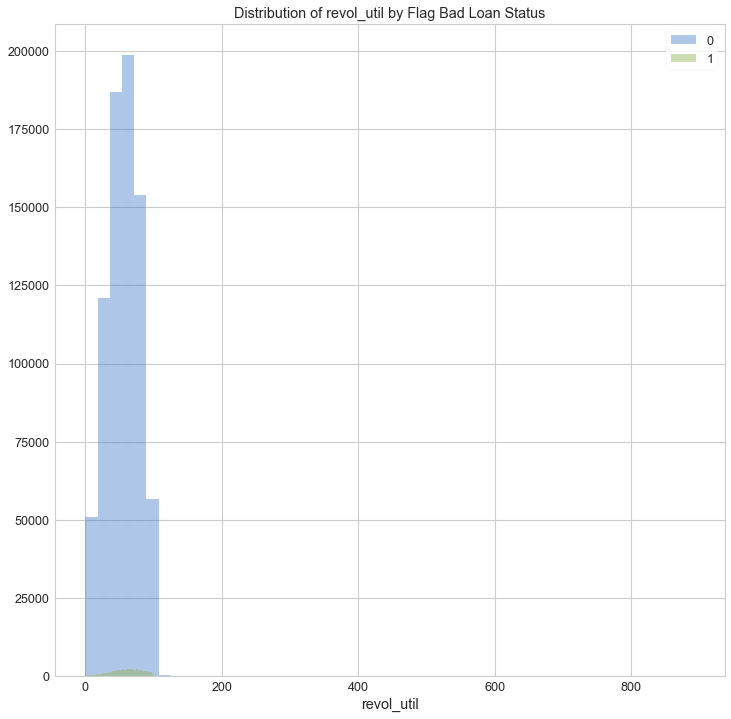

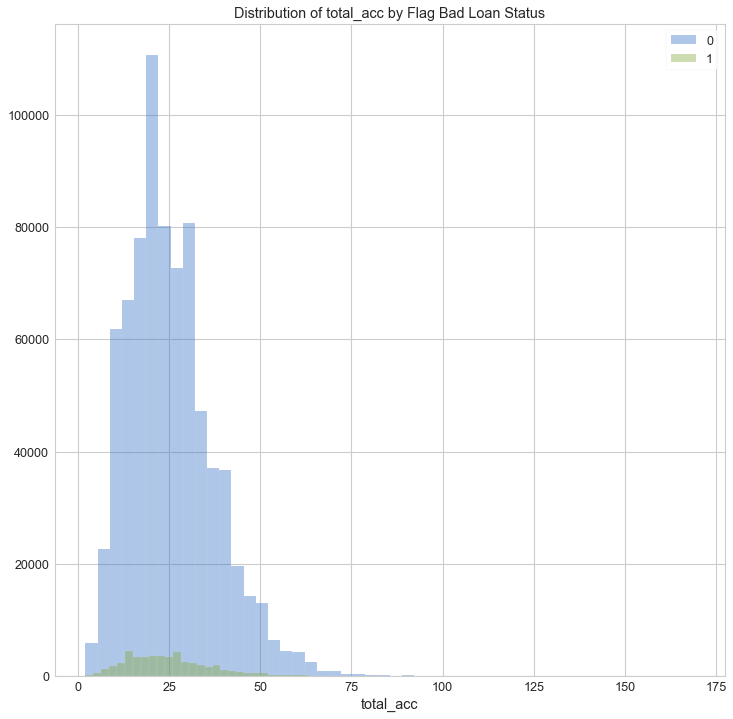

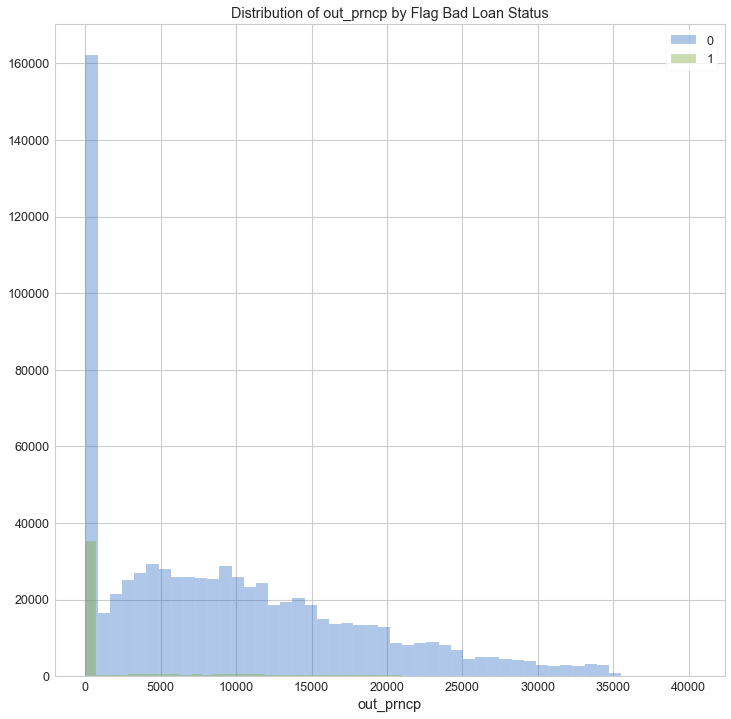

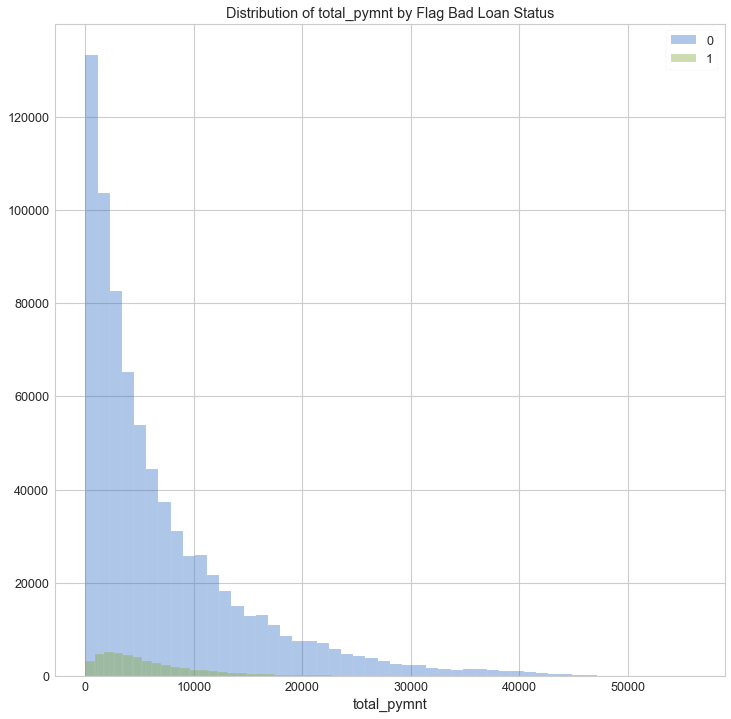

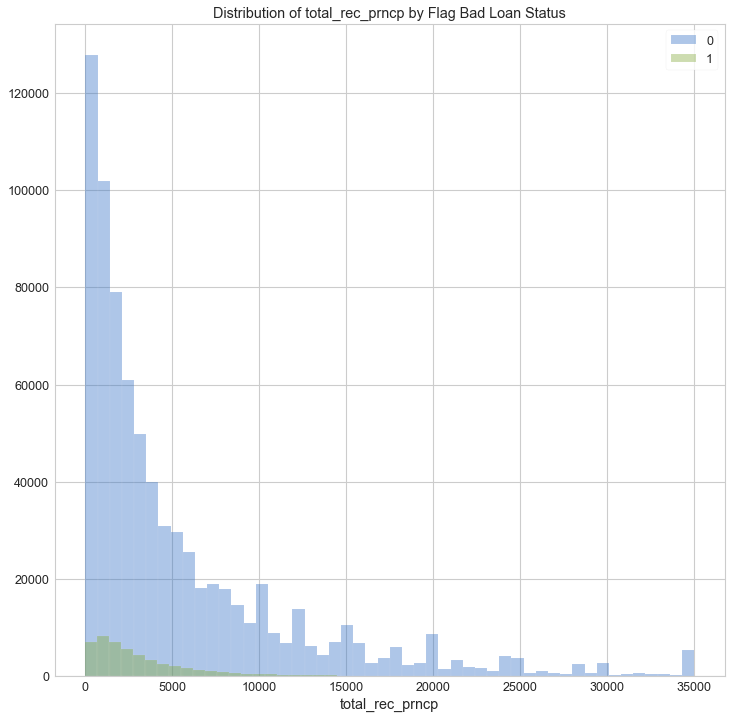

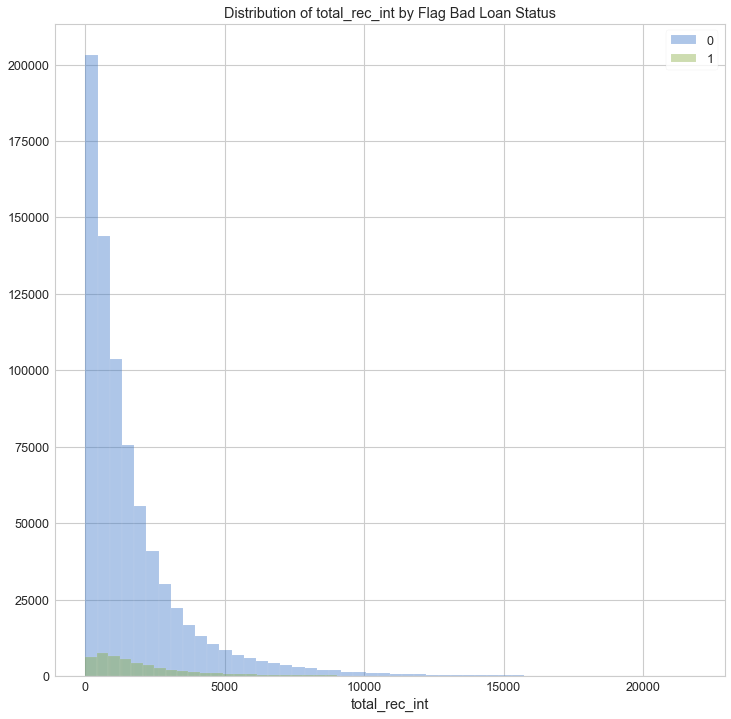

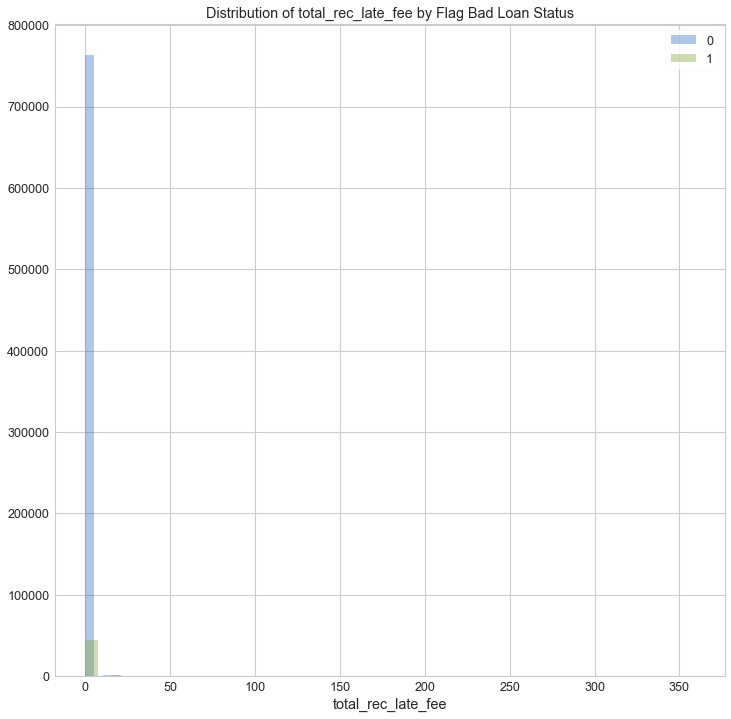

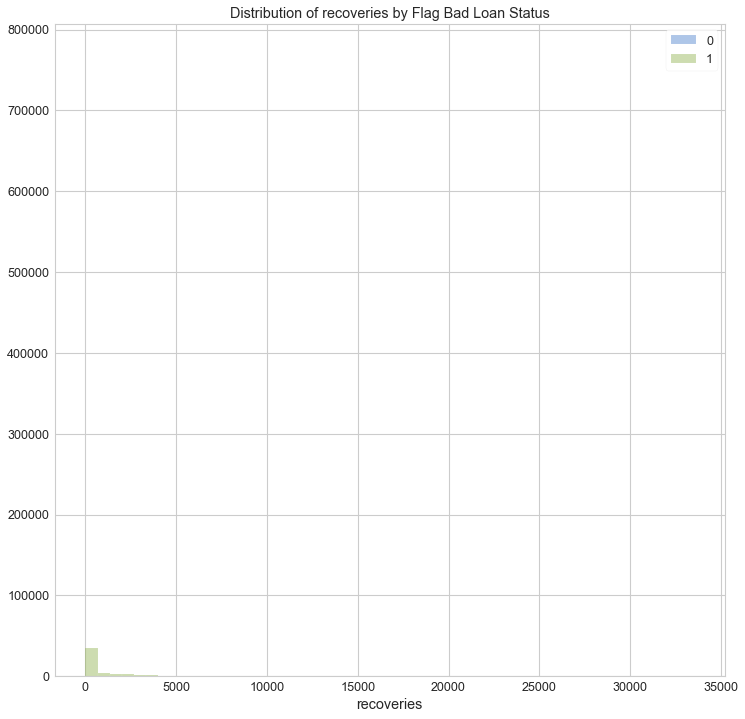

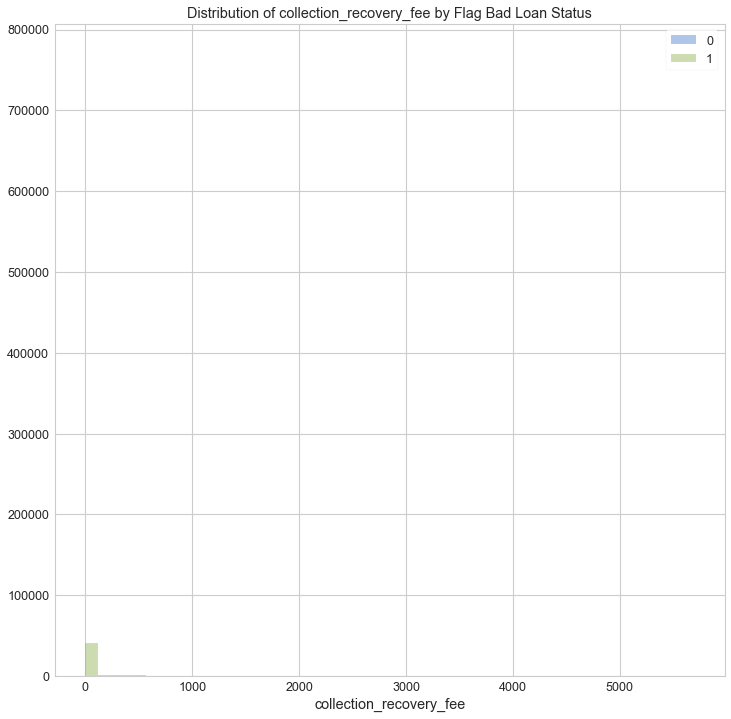

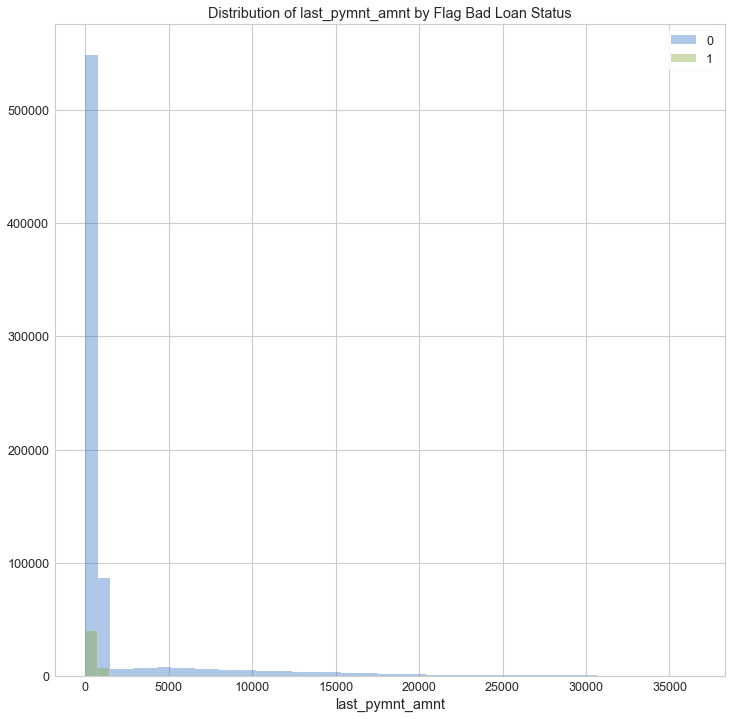

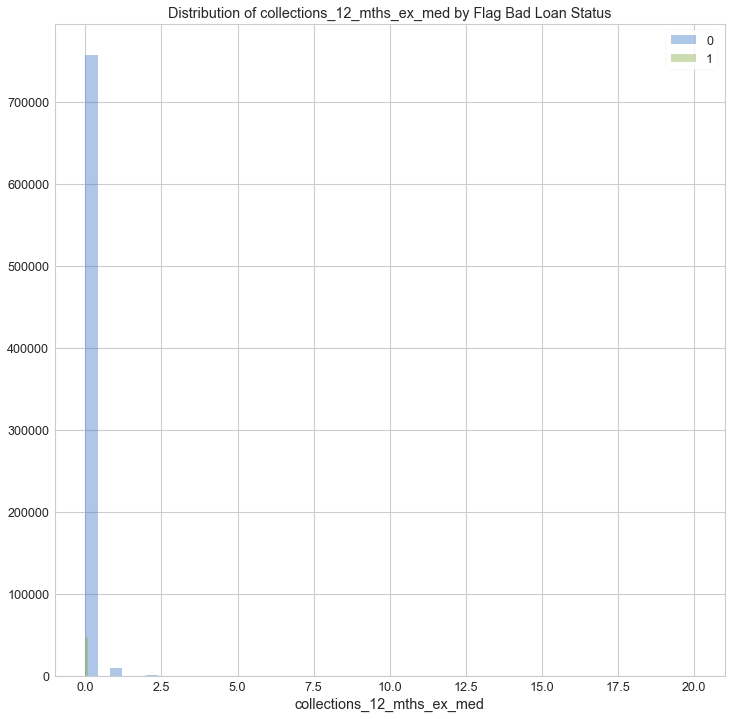

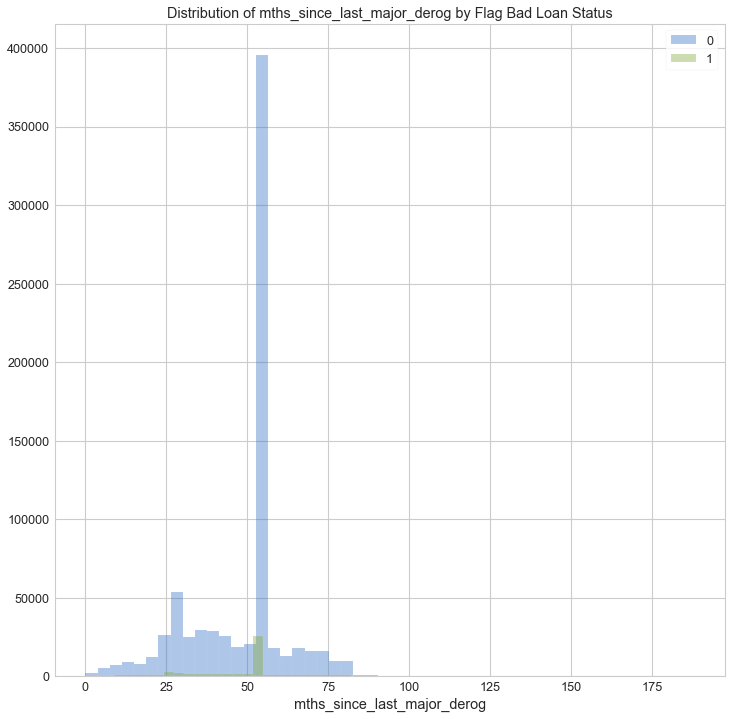

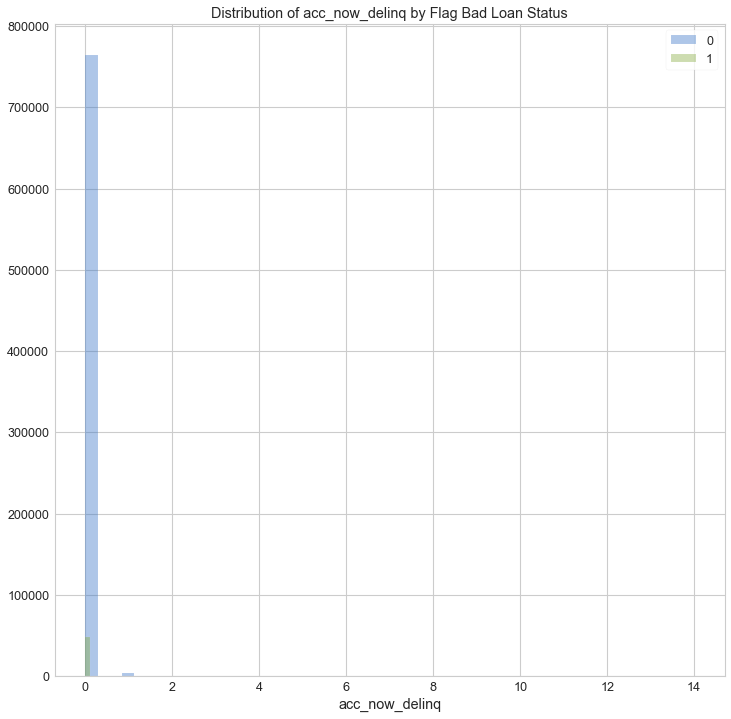

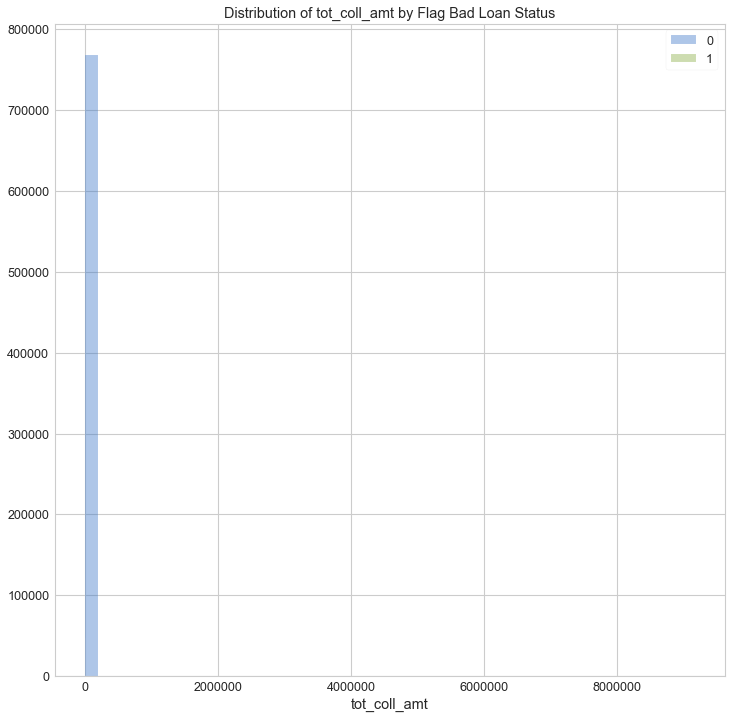

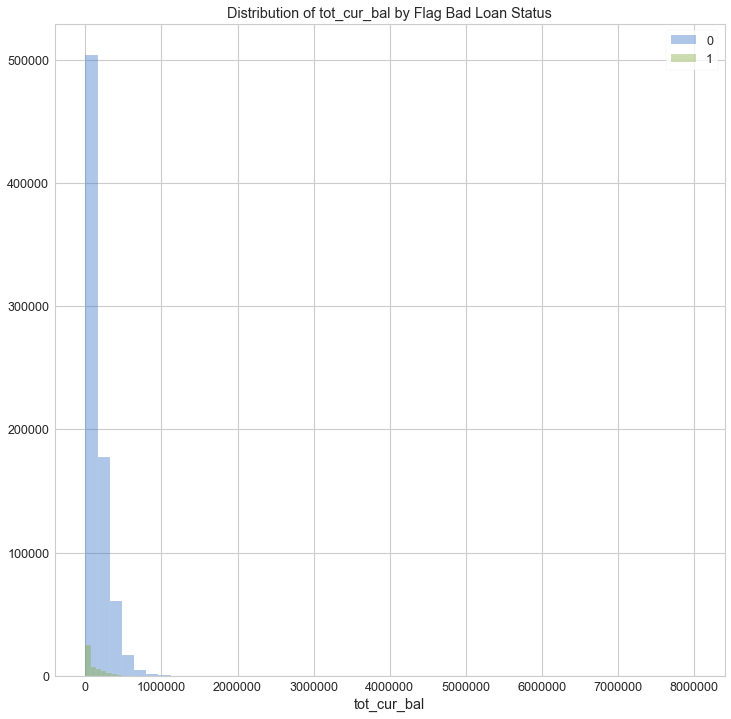

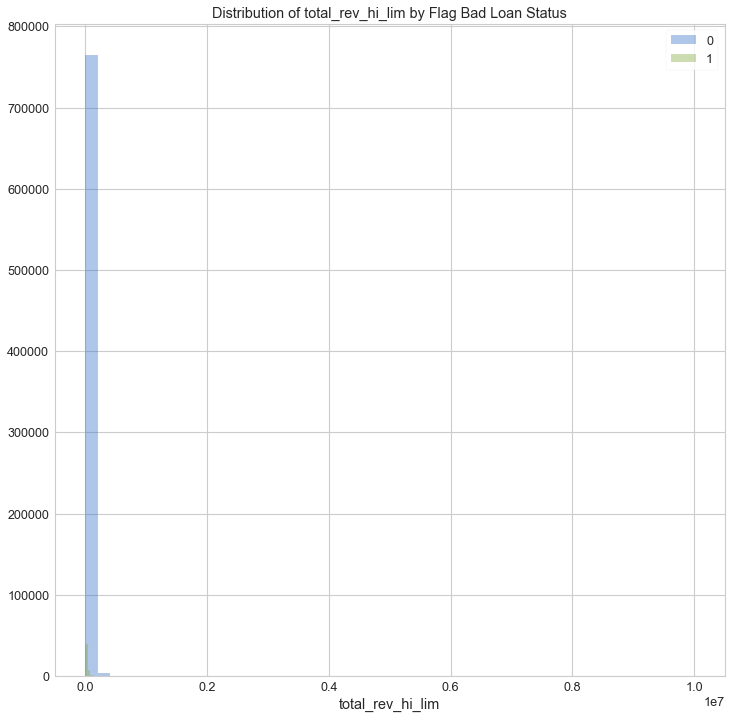

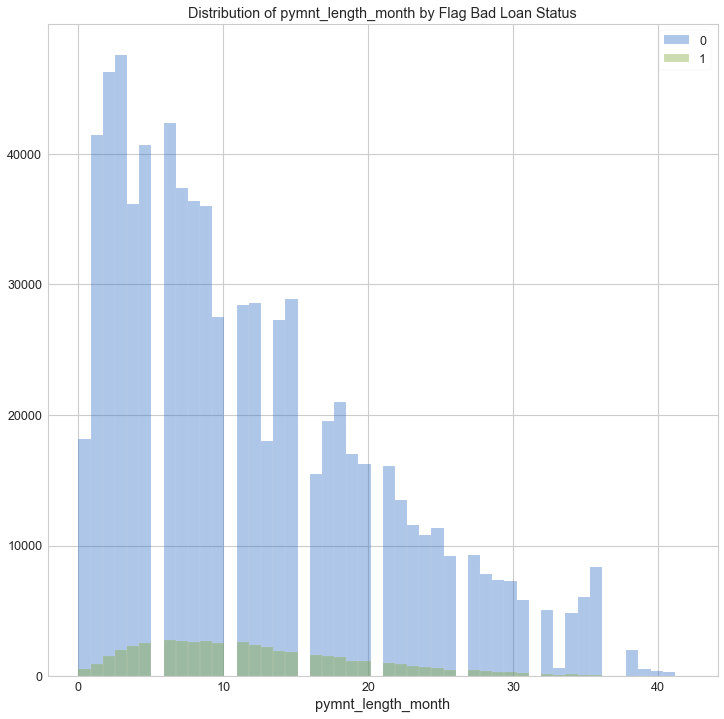

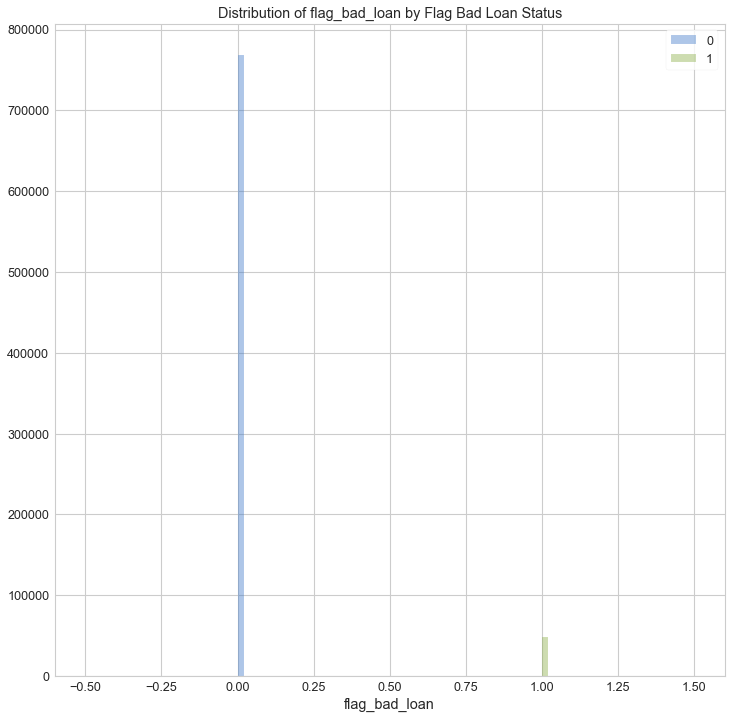

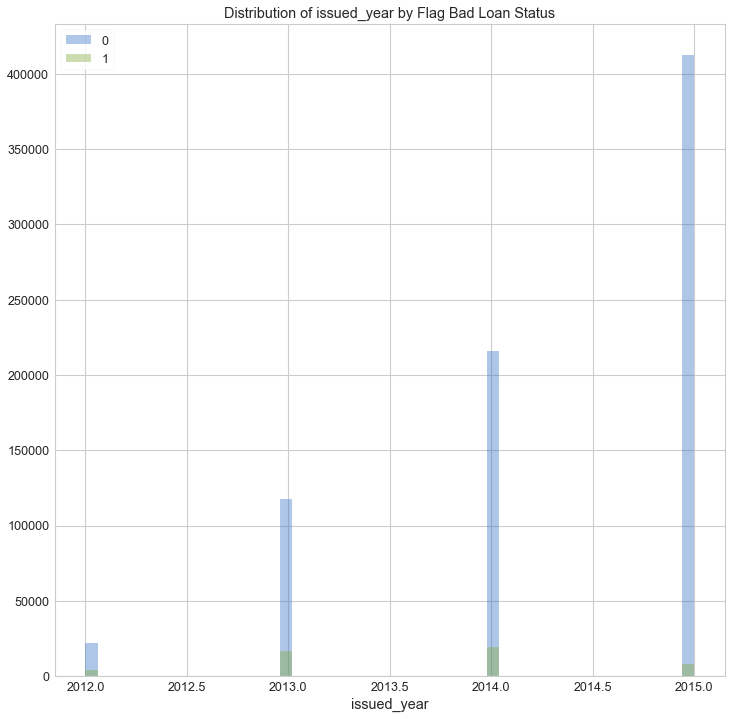

In [6]:
numerical_col= df.select_dtypes('number').columns
for i in numerical_col:
    plt.figure(figsize=(12,12))
    sns.set_style('whitegrid')
    sns.distplot(df[df['flag_bad_loan']==0][i], kde=False)
    sns.distplot(df[df['flag_bad_loan']==1][i], kde=False)
    plt.legend(df['flag_bad_loan'].unique())
    plt.title ('Distribution of {} by Flag Bad Loan Status'.format(i))
    plt.show()

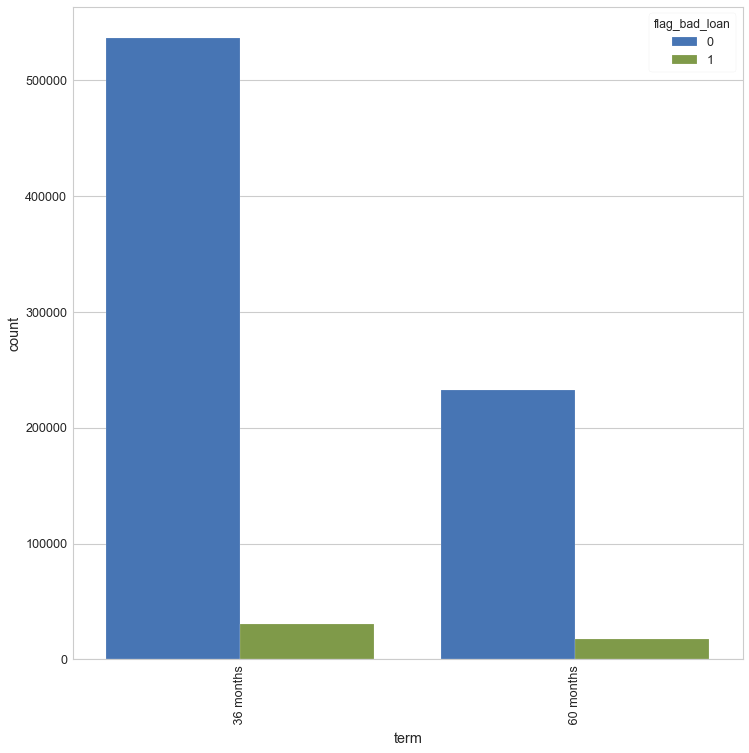

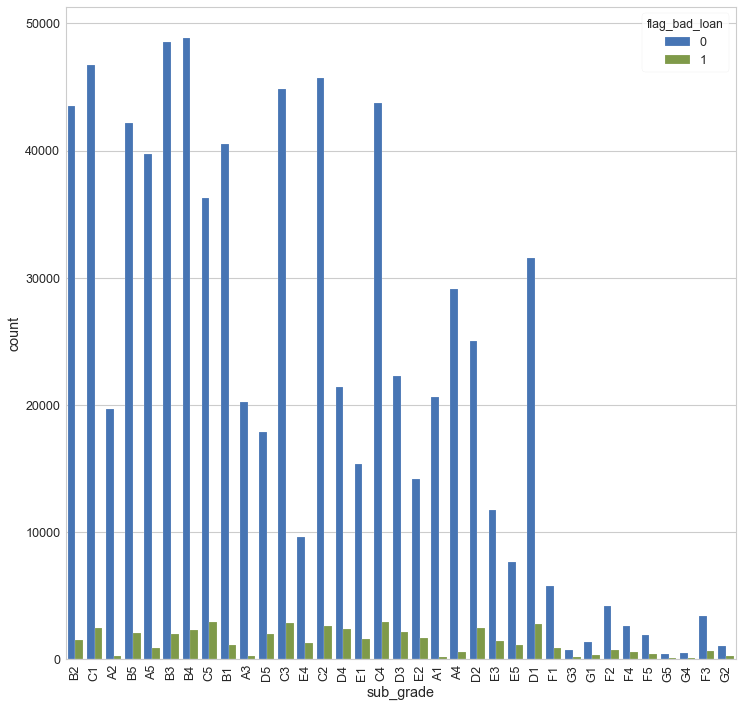

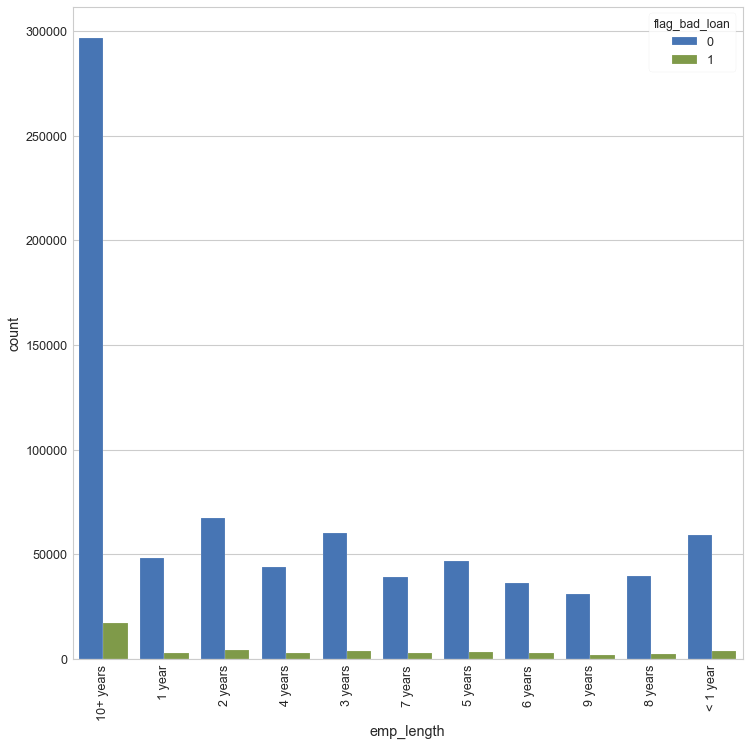

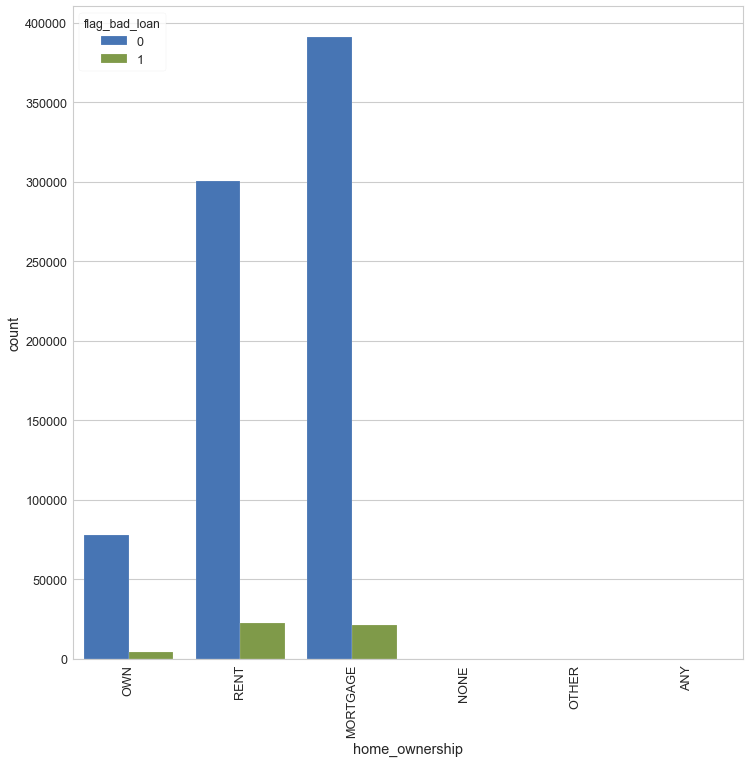

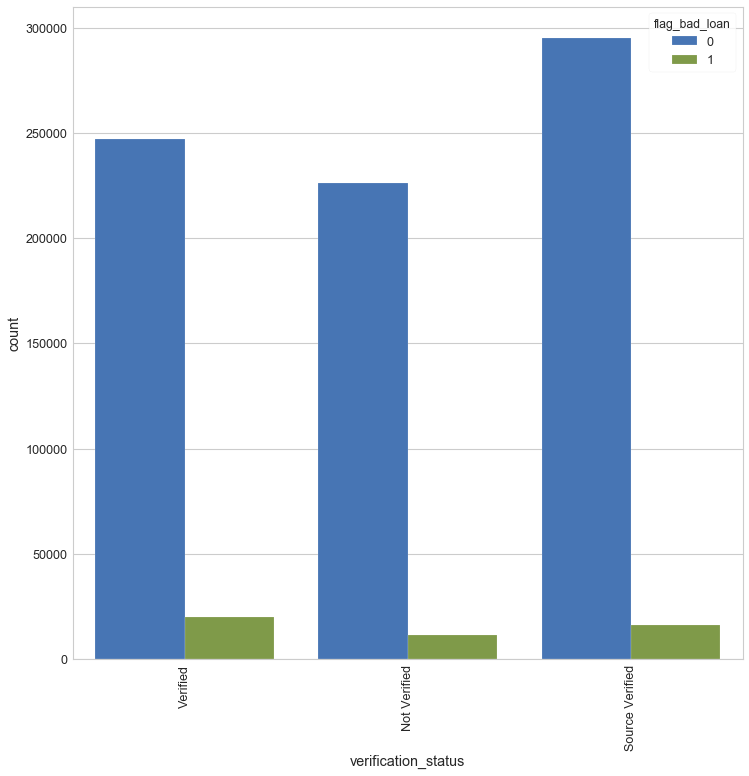

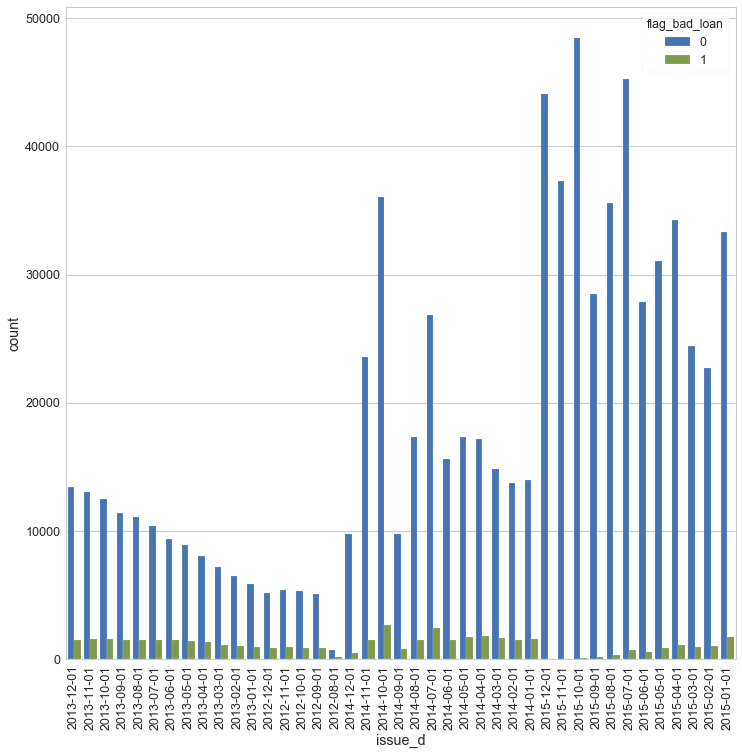

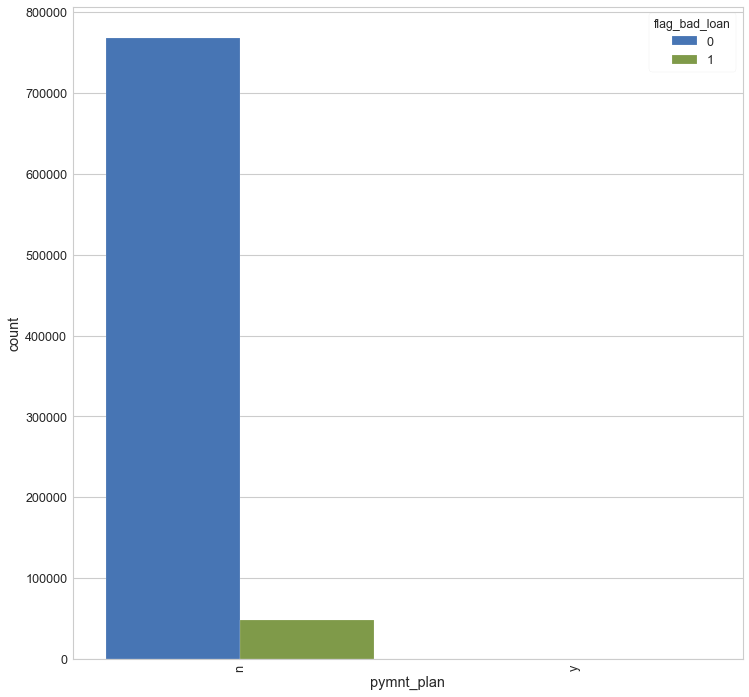

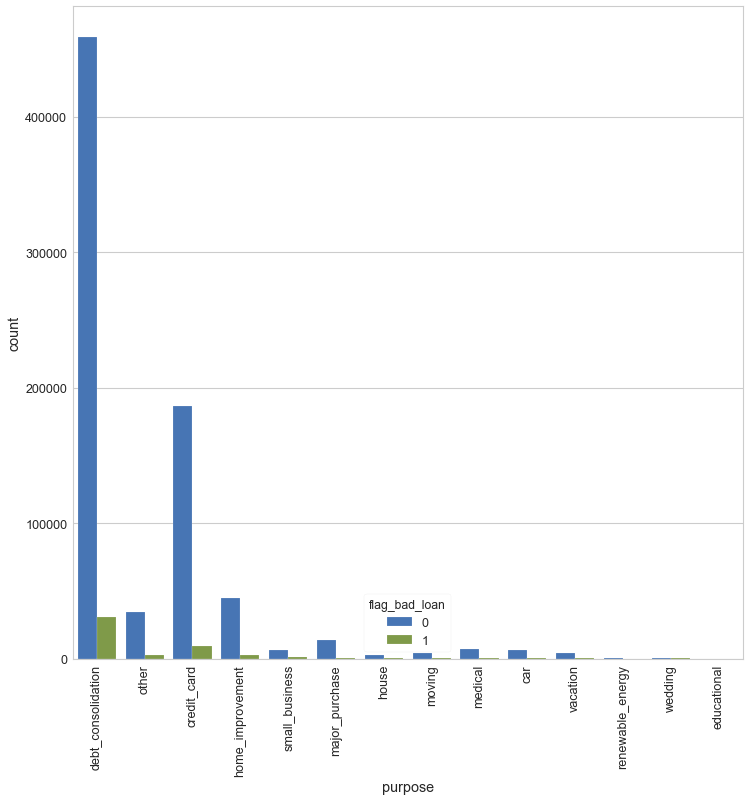

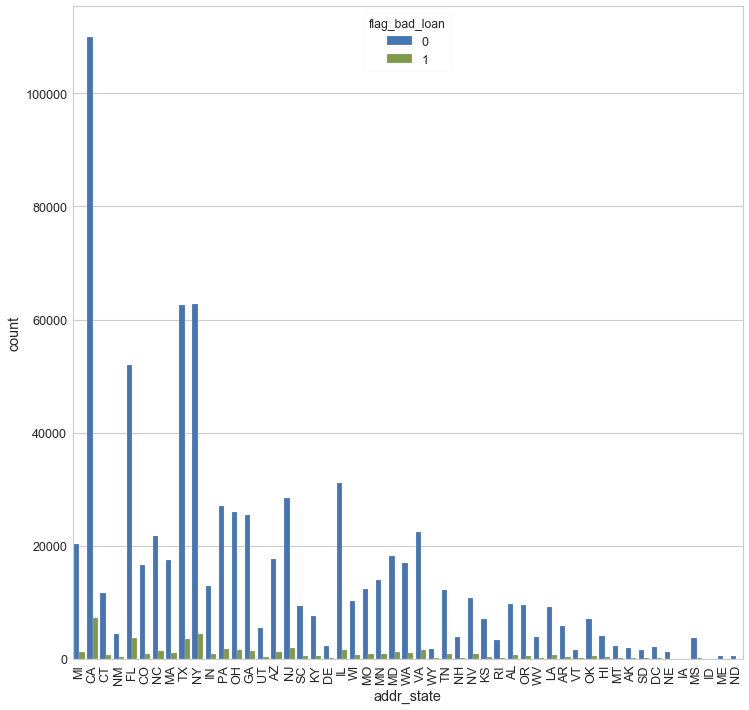

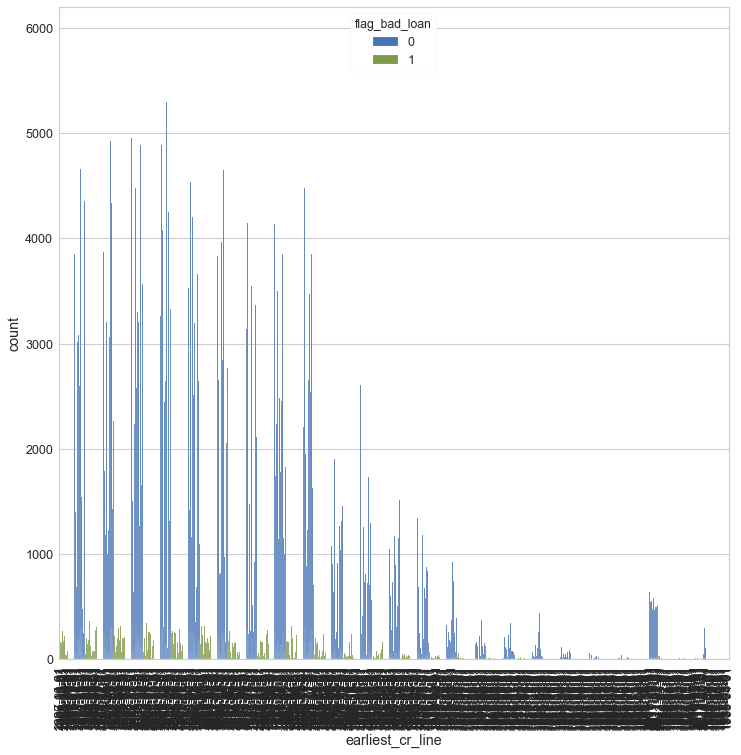

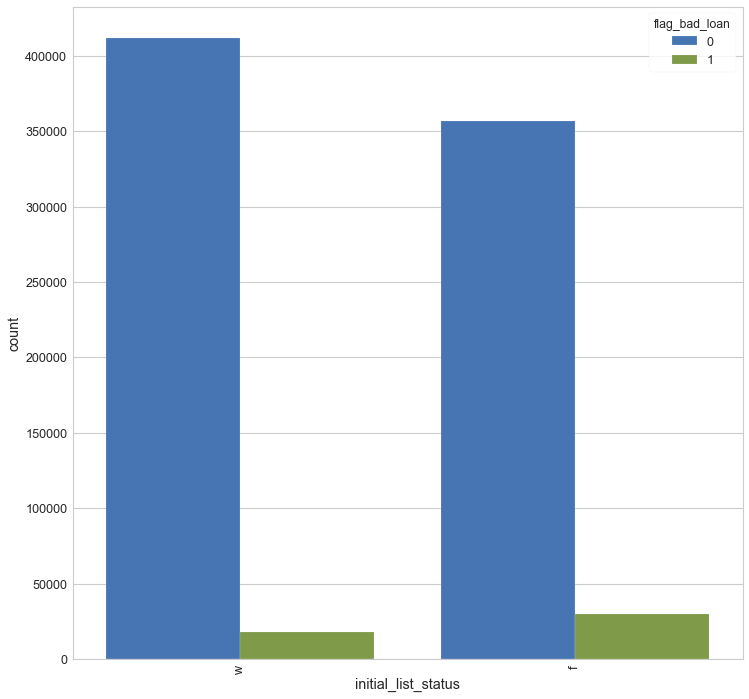

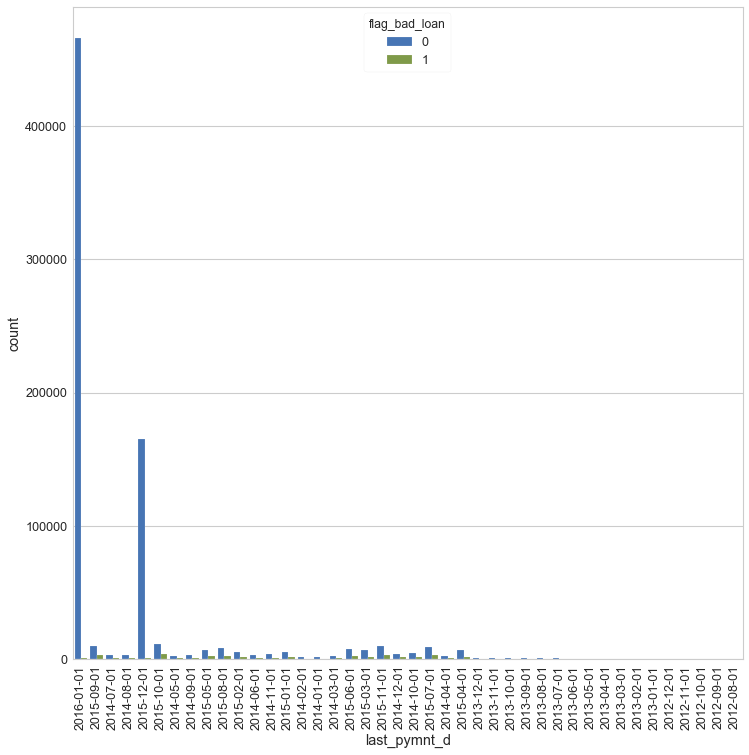

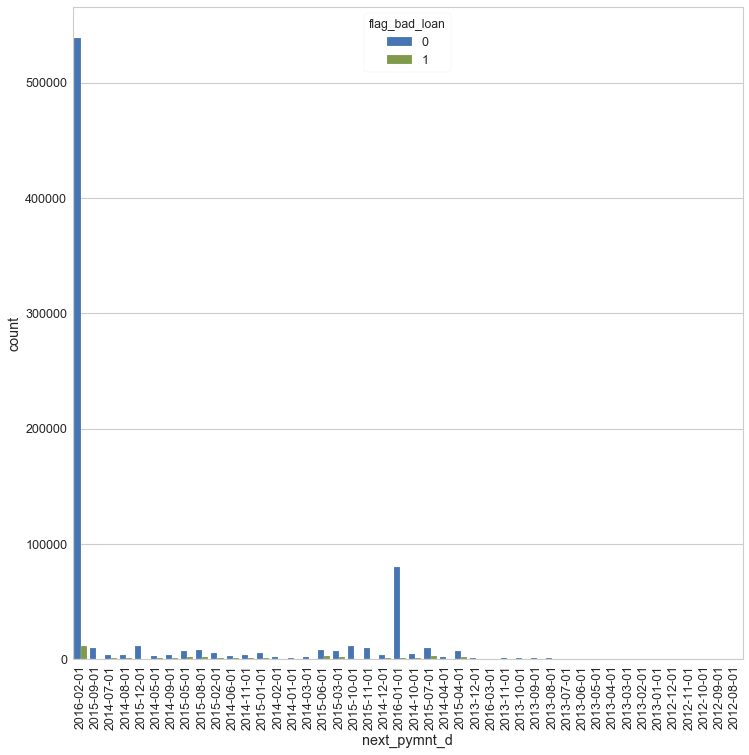

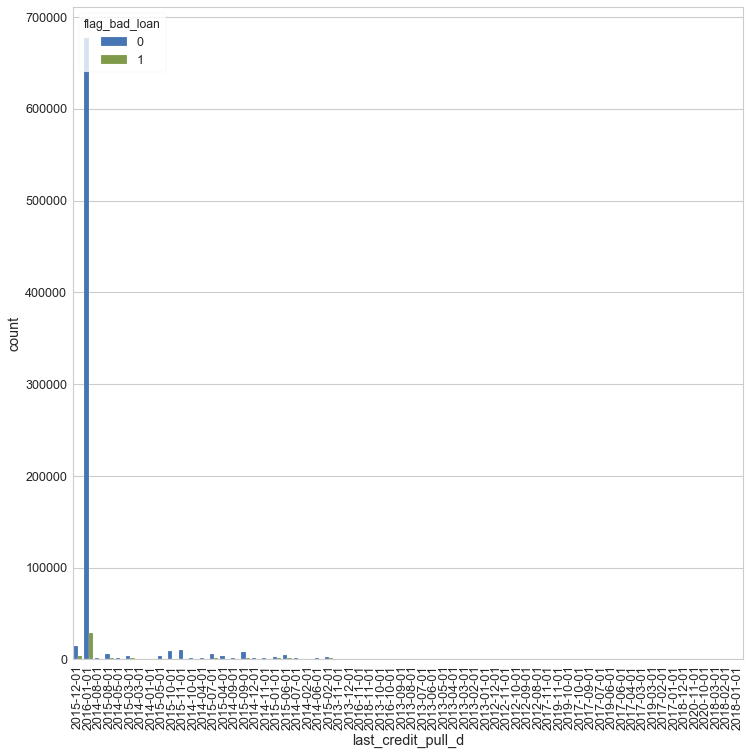

In [7]:
categorical_col= df.select_dtypes('object').columns
for i in categorical_col:
    plt.figure(figsize=(12,12))
    sns.set_style('whitegrid')
    sns.countplot(x = i, data=df[['flag_bad_loan',i]], hue='flag_bad_loan')
    plt.xticks(rotation=90)
    plt.show()

### Split Categorical feature and Numerical Feature

In [8]:
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes('number').columns

#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [9]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [10]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df[i], df['flag_bad_loan']))
CramersV= pd.DataFrame(data=[categorical_columns, cramers]).T
CramersV.columns= ['Column', 'CramersV']
CramersV.sort_values(by='CramersV', ascending=False)
CramersV

,Column,CramersV
0,term,0.0320431
1,sub_grade,0.144865
2,emp_length,0.0193422
3,home_ownership,0.0352663
4,verification_status,0.0499973
5,issue_d,0.199451
6,pymnt_plan,0.00190985
7,purpose,0.0435618
8,addr_state,0.0287867
9,earliest_cr_line,0.0299923


#### CORRELATION RATIO ( NUMERICAL VS CATEGORICAL)

In [11]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

In [12]:
corr_ratio = []
for i in numerical_columns:
    corr_ratio.append(correlation_ratio(df['flag_bad_loan'], df[i]))
    
Corr = pd.DataFrame(data=[numerical_columns, corr_ratio]
                   ).T
Corr.columns = ['Column', 'Corr_Ratio']
Corr.sort_values(by='Corr_Ratio', ascending=False)

,Column,Corr_Ratio
29,flag_bad_loan,1
19,recoveries,0.430036
20,collection_recovery_fee,0.324213
30,issued_year,0.185875
14,out_prncp,0.176398
1,int_rate,0.172873
18,total_rec_late_fee,0.151045
21,last_pymnt_amnt,0.0844754
16,total_rec_prncp,0.0825857
6,inq_last_6mths,0.0705843


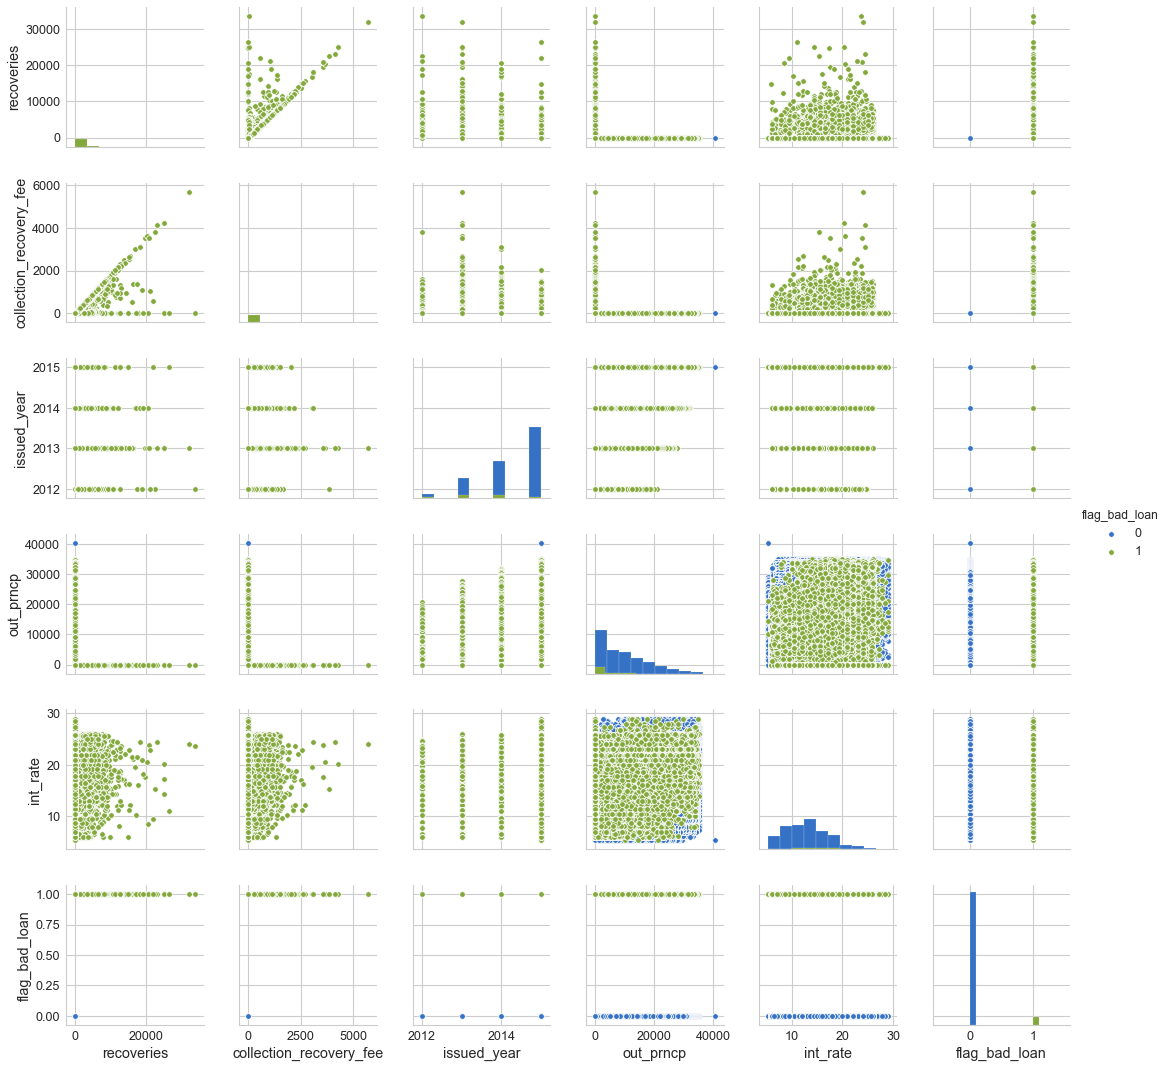

In [13]:
sns.pairplot(df[['recoveries','collection_recovery_fee', 'issued_year', 'out_prncp','int_rate','flag_bad_loan']] , hue='flag_bad_loan', diag_kind='hist')

funded_amnt
Correlation Ratio: 0.003962309186846448


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Not-Normal Distribution
Skewness: 0.6607904360418638, Kurtosis -0.2962738966375711


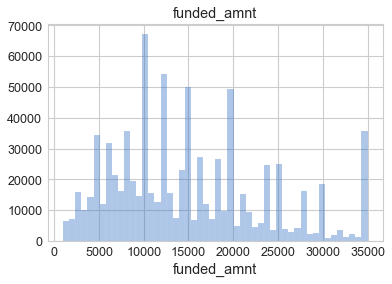



int_rate
Correlation Ratio: 0.1728728611027402
Not-Normal Distribution
Skewness: 0.43081350505458177, Kurtosis -0.15618740317861546


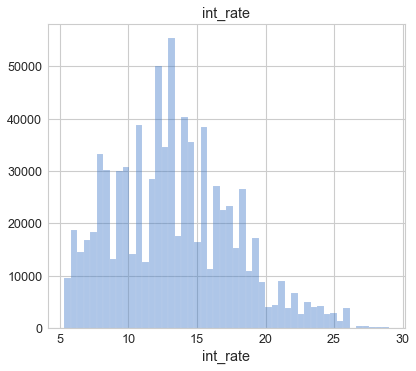



installment
Correlation Ratio: 0.01686869774579513
Not-Normal Distribution
Skewness: 0.9303520167414745, Kurtosis 0.6588710459033642


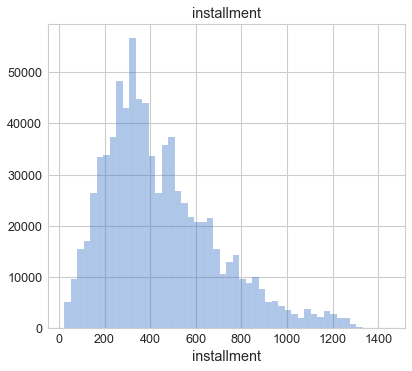



annual_inc
Correlation Ratio: 0.03315150046099635
Not-Normal Distribution
Skewness: 45.46696912907241, Kurtosis 4921.397051438762


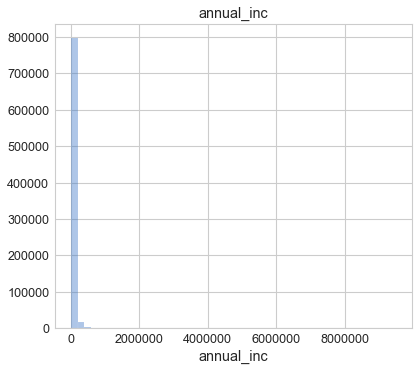



dti
Correlation Ratio: 0.02965575589927346
Not-Normal Distribution
Skewness: 0.21579353166958404, Kurtosis -0.5817124137305343


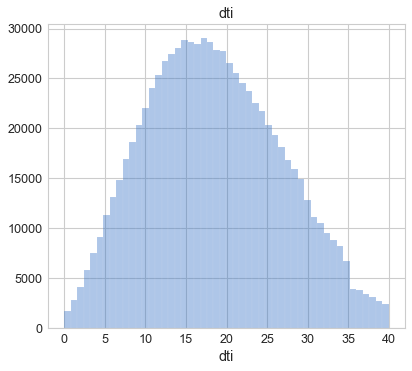



delinq_2yrs
Correlation Ratio: 0.0005073538580669894
Not-Normal Distribution
Skewness: 5.38679771501021, Kurtosis 55.4559798703646


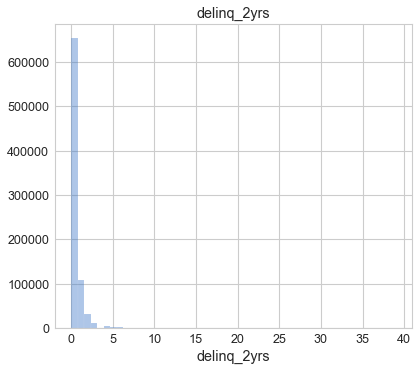



inq_last_6mths
Correlation Ratio: 0.07058431199266071
Not-Normal Distribution
Skewness: 1.7095793766925549, Kurtosis 3.327107919622545


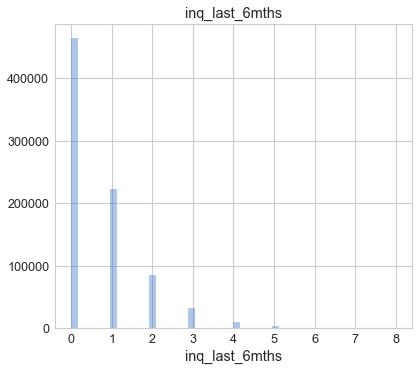



mths_since_last_delinq
Correlation Ratio: 0.00021364227383752378
Not-Normal Distribution
Skewness: -0.5245680548022967, Kurtosis 0.10967965936851432


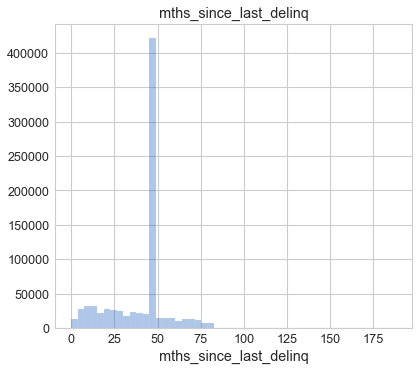



mths_since_last_record
Correlation Ratio: 0.0008181407749426398
Not-Normal Distribution
Skewness: 2.3725201809147696, Kurtosis 4.34303438433878


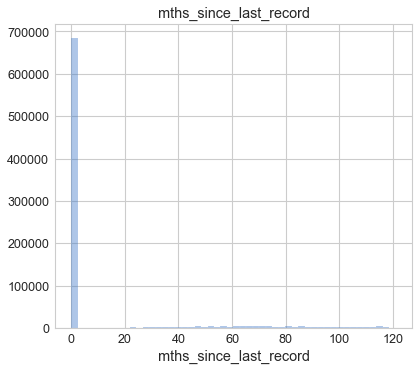



open_acc
Correlation Ratio: 0.009520937703629372
Not-Normal Distribution
Skewness: 1.2576970205459639, Kurtosis 3.1223662314068346


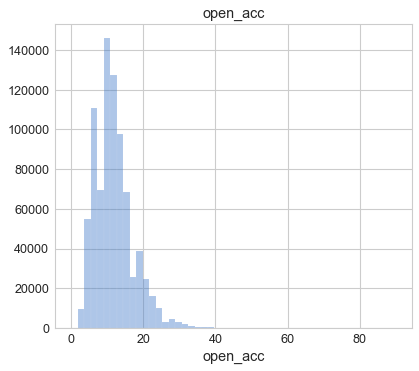



pub_rec
Correlation Ratio: 0.011344132212252613
Not-Normal Distribution
Skewness: 12.991639530853087, Kurtosis 946.111622261593


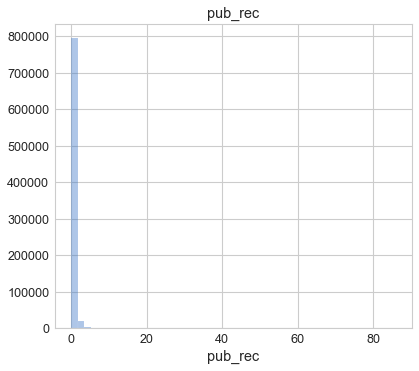



revol_bal
Correlation Ratio: 0.019725038064767126
Not-Normal Distribution
Skewness: 16.185034505680598, Kurtosis 1006.2650020555595


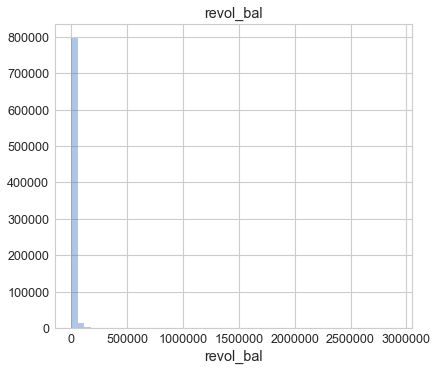



revol_util
Correlation Ratio: 0.043694552189368636
Not-Normal Distribution
Skewness: -0.10052325253314788, Kurtosis 1.3017788604439433


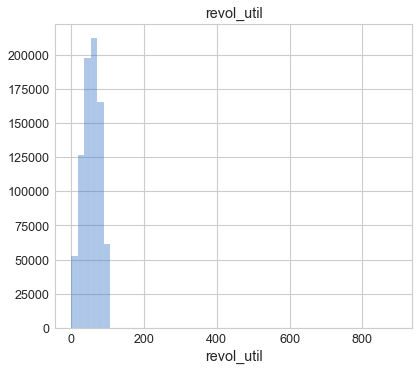



total_acc
Correlation Ratio: 0.012045926660674602
Not-Normal Distribution
Skewness: 0.90033732419911, Kurtosis 1.4228770518302314


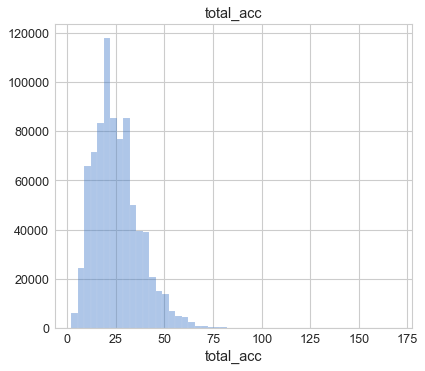



out_prncp
Correlation Ratio: 0.1763983916588318
Not-Normal Distribution
Skewness: 0.8474889934115835, Kurtosis 0.005253354159663104


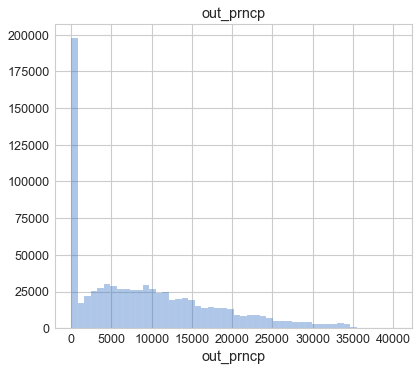



total_pymnt
Correlation Ratio: 0.03315754457637587
Not-Normal Distribution
Skewness: 1.8674771059737971, Kurtosis 4.000936452663871


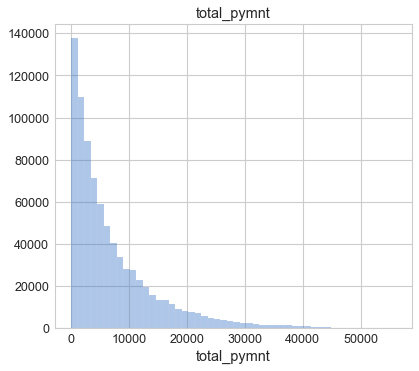



total_rec_prncp
Correlation Ratio: 0.08258574707870547
Not-Normal Distribution
Skewness: 2.0880557900934393, Kurtosis 4.76562289113701


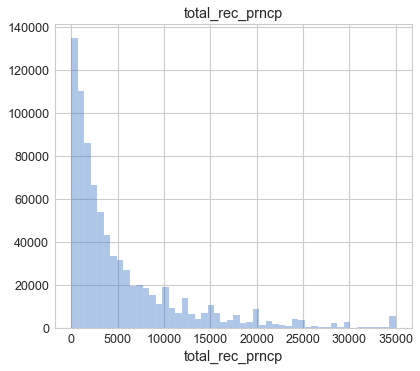



total_rec_int
Correlation Ratio: 0.058855436472406965
Not-Normal Distribution
Skewness: 2.7523232537054283, Kurtosis 10.864542083508736


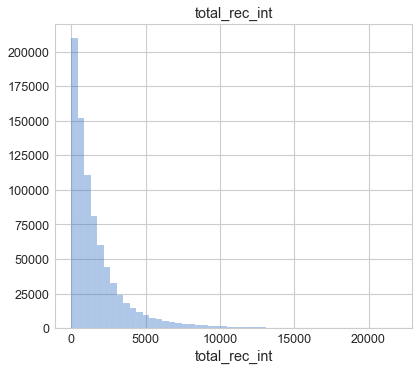



total_rec_late_fee
Correlation Ratio: 0.15104456350963055
Not-Normal Distribution
Skewness: 19.567539900753697, Kurtosis 664.2608588360648


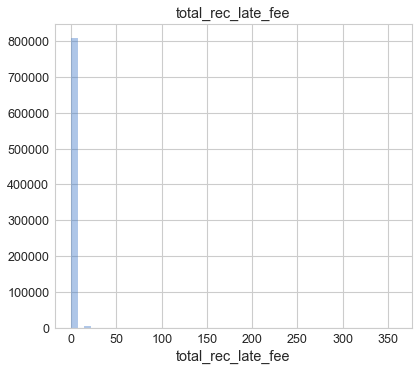



recoveries
Correlation Ratio: 0.4300358860523776
Not-Normal Distribution
Skewness: 17.118220991524765, Kurtosis 585.1371880913488


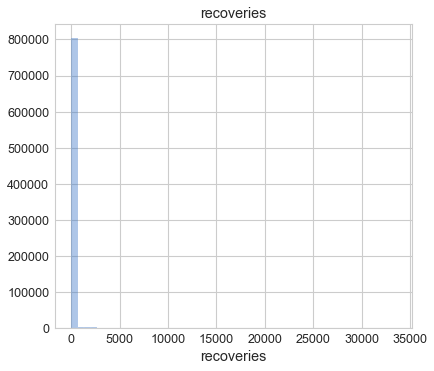



collection_recovery_fee
Correlation Ratio: 0.3242132530269756
Not-Normal Distribution
Skewness: 20.39994409885129, Kurtosis 732.0677626771512


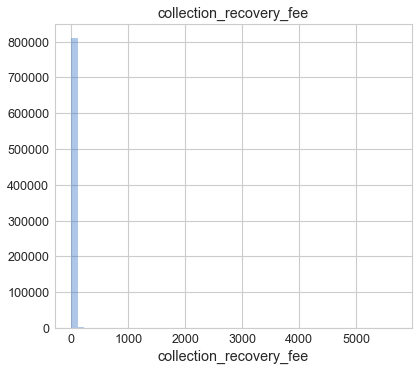



last_pymnt_amnt
Correlation Ratio: 0.08447541711369176
Not-Normal Distribution
Skewness: 3.5579818691765612, Kurtosis 13.908746816871329


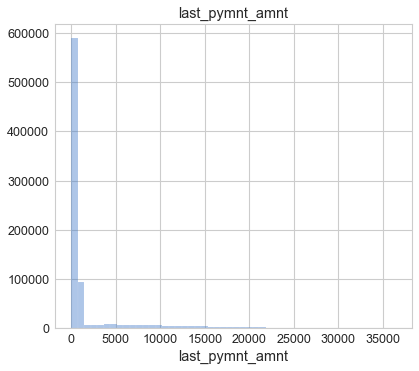



collections_12_mths_ex_med
Correlation Ratio: 0.005551242062923709
Not-Normal Distribution
Skewness: 16.711150874180415, Kurtosis 1013.0081614594554


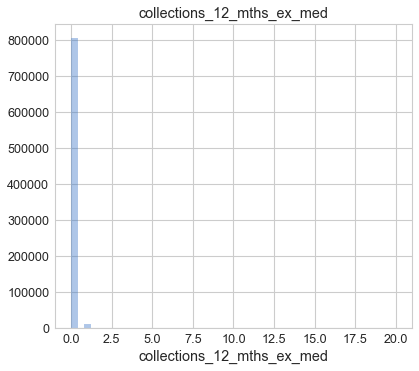



mths_since_last_major_derog
Correlation Ratio: 0.0013977646353865688
Not-Normal Distribution
Skewness: -0.30804719518185425, Kurtosis 1.8135454591097204


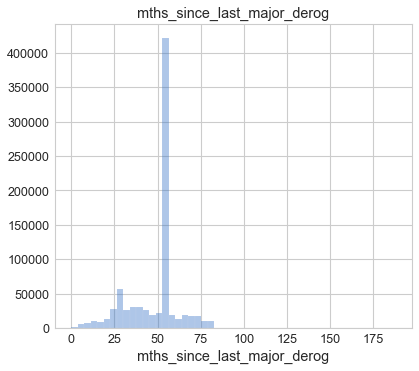



acc_now_delinq
Correlation Ratio: 0.0016437545239642185
Not-Normal Distribution
Skewness: 23.10415768408937, Kurtosis 1503.8106971879413


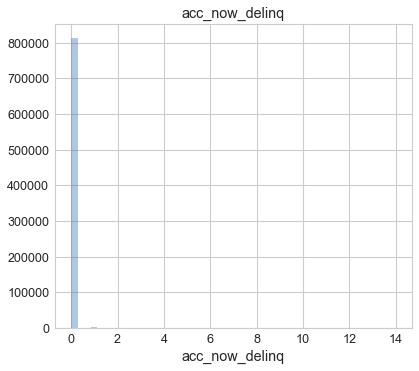



tot_coll_amt
Correlation Ratio: 0.0016687777611347936
Not-Normal Distribution
Skewness: 855.9251182054994, Kurtosis 759147.9822296427


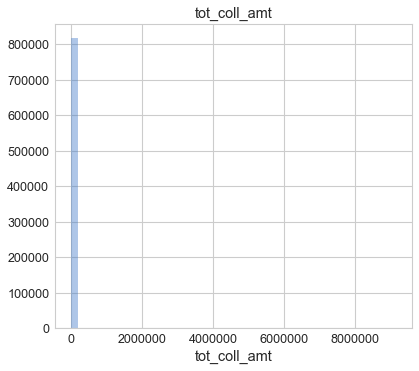



tot_cur_bal
Correlation Ratio: 0.0386589245125169
Not-Normal Distribution
Skewness: 2.919328165881022, Kurtosis 29.426422676272274


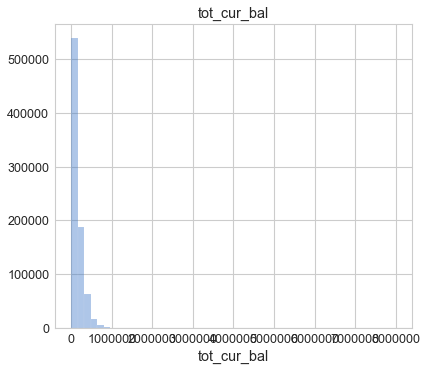



total_rev_hi_lim
Correlation Ratio: 0.03669802652218701
Not-Normal Distribution
Skewness: 73.04233720657604, Kurtosis 18395.5066831905


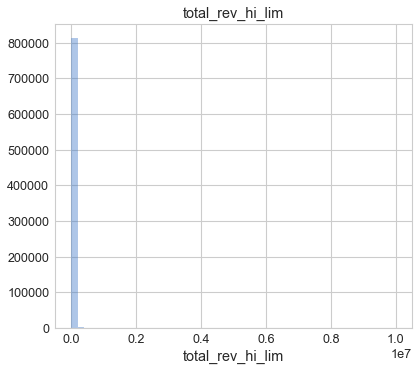



pymnt_length_month
Correlation Ratio: 0.005601078064410501
Not-Normal Distribution
Skewness: 0.8438467610926964, Kurtosis -0.0021890439556164765


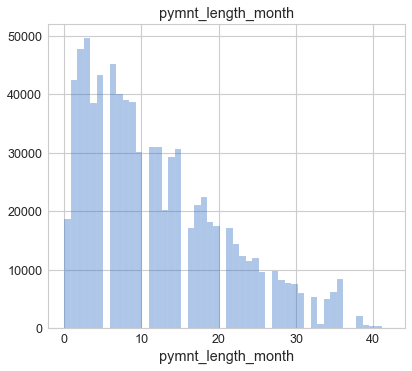



flag_bad_loan
Correlation Ratio: 0.9999999999999999
Not-Normal Distribution
Skewness: 3.7564441173947682, Kurtosis 12.110872407109746


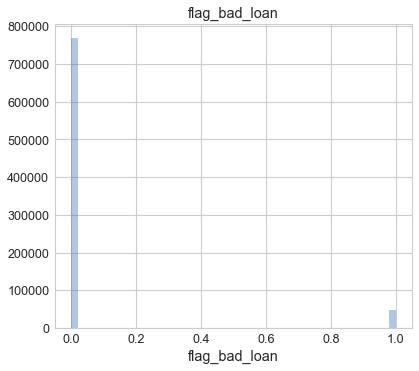



issued_year
Correlation Ratio: 0.18587490393514305
Not-Normal Distribution
Skewness: -0.891048870087032, Kurtosis -0.23262761137247123


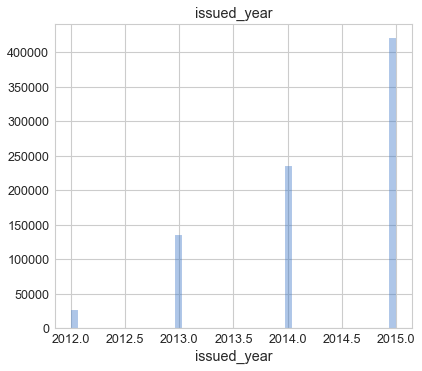

In [14]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in numerical_columns:
    print(i)
    print(('Correlation Ratio: {}'.format(
        correlation_ratio(df['flag_bad_loan'], df[i]))))
    if shapiro(df[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')

    print(('Skewness: {}, Kurtosis {}'.format(skew(df[i]),
                                              kurtosis(df[i]))))
    sns.distplot(df[i],kde=False)
    jtplot.style()
    plt.title(i)
    plt.show()
    print('\n')

## 3. HYPOTHESIS TESTING

### 3.1 Check Categorical Column using Chi Squared

In [15]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(
            pd.crosstab(df['flag_bad_loan'],
                        df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data=[categorical_columns, chi2_check]
                   ).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,term,Reject Null Hypothesis
1,sub_grade,Reject Null Hypothesis
2,emp_length,Reject Null Hypothesis
3,home_ownership,Reject Null Hypothesis
4,verification_status,Reject Null Hypothesis
5,issue_d,Reject Null Hypothesis
6,pymnt_plan,Reject Null Hypothesis
7,purpose,Reject Null Hypothesis
8,addr_state,Reject Null Hypothesis
9,earliest_cr_line,Reject Null Hypothesis


### Check Dummies in Categorical Column which Reject Null Hypothesis by using Chi Squared

In [16]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    dummies = pd.get_dummies(df[i])
    bon_p_value = 0.0005/df[i].nunique() 
#     changing the critical value depend on the nuniqueu value in each features
    for series in dummies:
        if chi2_contingency(pd.crosstab(df['flag_bad_loan'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
            
res_chi = pd.DataFrame(data = [list(check.keys()), list(check.values())]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,term+ 36 months,Reject Null Hypothesis
1,term+ 60 months,Reject Null Hypothesis
2,sub_grade+A1,Reject Null Hypothesis
3,sub_grade+A2,Reject Null Hypothesis
4,sub_grade+A3,Reject Null Hypothesis
...,...,...
1005,last_credit_pull_d+2019-06-01,Fail to Reject Null Hypothesis
1006,last_credit_pull_d+2019-10-01,Fail to Reject Null Hypothesis
1007,last_credit_pull_d+2019-11-01,Fail to Reject Null Hypothesis
1008,last_credit_pull_d+2020-10-01,Fail to Reject Null Hypothesis


In [17]:
res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']

,Pair,Hypothesis
0,term+ 36 months,Reject Null Hypothesis
1,term+ 60 months,Reject Null Hypothesis
2,sub_grade+A1,Reject Null Hypothesis
3,sub_grade+A2,Reject Null Hypothesis
4,sub_grade+A3,Reject Null Hypothesis
...,...,...
983,last_credit_pull_d+2015-09-01,Reject Null Hypothesis
984,last_credit_pull_d+2015-10-01,Reject Null Hypothesis
985,last_credit_pull_d+2015-11-01,Reject Null Hypothesis
986,last_credit_pull_d+2015-12-01,Reject Null Hypothesis


### 3.2 Check Numerical Column using Mannwhitney U

In [18]:
from scipy.stats import mannwhitneyu
mann = []
for i in numerical_columns:
    if mannwhitneyu(df[df['flag_bad_loan'] == 0][i],
                    df[df['flag_bad_loan'] == 1][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res_mann = pd.DataFrame(
    data=[list(numerical_columns), mann]).T
res_mann.columns = ['Columns', 'Hypothesis']
res_mann

,Columns,Hypothesis
0,funded_amnt,Reject Null Hypothesis
1,int_rate,Reject Null Hypothesis
2,installment,Reject Null Hypothesis
3,annual_inc,Reject Null Hypothesis
4,dti,Reject Null Hypothesis
5,delinq_2yrs,Fail to Reject Null Hypothesis
6,inq_last_6mths,Reject Null Hypothesis
7,mths_since_last_delinq,Fail to Reject Null Hypothesis
8,mths_since_last_record,Reject Null Hypothesis
9,open_acc,Reject Null Hypothesis


## 4. PRE-MODELING 

In [19]:
df_dummies = pd.get_dummies(
    data=df, columns=list(categorical_columns))

In [20]:
df['emp_length'].value_counts()

10+ years    313816
2 years       71493
3 years       63804
< 1 year      63142
1 year        51533
5 years       50029
4 years       46858
8 years       41928
7 years       41759
6 years       38996
9 years       33234
Name: emp_length, dtype: int64

In [21]:
df_dummies.head()

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_length_month,flag_bad_loan,issued_year,term_ 36 months,term_ 60 months,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_2012-08-01,issue_d_2012-09-01,issue_d_2012-10-01,issue_d_2012-11-01,issue_d_2012-12-01,issue_d_2013-01-01,issue_d_2013-02-01,issue_d_2013-03-01,issue_d_2013-04-01,issue_d_2013-05-01,issue_d_2013-06-01,issue_d_2013-07-01,issue_d_2013-08-01,issue_d_2013-09-01,issue_d_2013-10-01,issue_d_2013-11-01,issue_d_2013-12-01,issue_d_2014-01-01,issue_d_2014-02-01,issue_d_2014-03-01,issue_d_2014-04-01,issue_d_2014-05-01,issue_d_2014-06-01,issue_d_2014-07-01,issue_d_2014-08-01,issue_d_2014-09-01,issue_d_2014-10-01,issue_d_2014-11-01,issue_d_2014-12-01,issue_d_2015-01-01,issue_d_2015-02-01,issue_d_2015-03-01,issue_d_2015-04-01,issue_d_2015-05-01,issue_d_2015-06-01,issue_d_2015-07-01,issue_d_2015-08-01,issue_d_2015-09-01,issue_d_2015-10-01,issue_d_2015-11-01,issue_d_2015-12-01,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,earliest_cr_line_1944-01-01,earliest_cr_line_1946-08-01,earliest_cr_line_1948-01-01,earliest_cr_line_1949-06-01,earliest_cr_line_1950-01-01,earliest_cr_line_1950-05-01,earliest_cr_line_1950-08-01,earliest_cr_line_1950-10-01,earliest_cr_line_1950-11-01,earliest_cr_line_1951-01-01,earliest_cr_line_1951-07-01,earliest_cr_line_1951-08-01,earliest_cr_line_1951-12-01,earliest_cr_line_1952-01-01,earliest_cr_line_1953-01-01,earliest_cr_line_1953-05-01,earliest_cr_line_1953-09-01,earliest_cr_line_1953-11-01,earliest_cr_line_1954-01-01,earliest_cr_line_1954-11-01,earliest_cr_line_1955-01-01,earliest_cr_line_1955-03-01,earliest_cr_line_1955-04-01,earliest_cr_line_1955-05-01,earliest_cr_line_1955-06-01,earliest_cr_line_1955-07-01,earliest_cr_line_1955-08-01,earliest_cr_line_1955-11-01,earliest_cr_line_1956-01-01,earliest_cr_line_1956-09-01,earlie

In [22]:
# testing back the chi on dummies
significant_chi = []
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    significant_chi.append('{}_{}'.format(i.split('+')[0],i.split('+')[1]))


In [30]:
significant_chi[35]

'emp_length_10'

In [31]:
significant_chi[35] = significant_chi[35].replace ('emp_length_10','emp_length_10+ years')

In [24]:
for i in res_mann[res_mann['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    significant_chi.append(i)

In [25]:
df_dummies.columns

Index(['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc',
       ...
       'last_credit_pull_d_2018-02-01', 'last_credit_pull_d_2018-03-01',
       'last_credit_pull_d_2018-11-01', 'last_credit_pull_d_2018-12-01',
       'last_credit_pull_d_2019-03-01', 'last_credit_pull_d_2019-06-01',
       'last_credit_pull_d_2019-10-01', 'last_credit_pull_d_2019-11-01',
       'last_credit_pull_d_2020-10-01', 'last_credit_pull_d_2020-11-01'],
      dtype='object', length=1041)

In [26]:
significant_chi

['term_ 36 months',
 'term_ 60 months',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'emp_length_10',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'issue_d_2012-08-01',
 'issue_d_2012-09-01',
 'issue_d_2012-10-01',
 'issue_d_2012-11-01',
 'issue_d_2012-12-01',
 'issue_d_20

In [32]:
df_sig = df_dummies[significant_chi].copy()

In [33]:
df_sig.head()

,term_ 36 months,term_ 60 months,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_5 years,emp_length_6 years,emp_length_7 years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_2012-08-01,issue_d_2012-09-01,issue_d_2012-10-01,issue_d_2012-11-01,issue_d_2012-12-01,issue_d_2013-01-01,issue_d_2013-02-01,issue_d_2013-03-01,issue_d_2013-04-01,issue_d_2013-05-01,issue_d_2013-06-01,issue_d_2013-07-01,issue_d_2013-08-01,issue_d_2013-09-01,issue_d_2013-10-01,issue_d_2013-11-01,issue_d_2013-12-01,issue_d_2014-01-01,issue_d_2014-02-01,issue_d_2014-03-01,issue_d_2014-04-01,issue_d_2014-05-01,issue_d_2014-06-01,issue_d_2014-07-01,issue_d_2014-08-01,issue_d_2014-09-01,issue_d_2014-10-01,issue_d_2015-01-01,issue_d_2015-02-01,issue_d_2015-03-01,issue_d_2015-04-01,issue_d_2015-05-01,issue_d_2015-06-01,issue_d_2015-07-01,issue_d_2015-08-01,issue_d_2015-09-01,issue_d_2015-10-01,issue_d_2015-11-01,issue_d_2015-12-01,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_wedding,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_ME,addr_state_MS,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NV,addr_state_NY,addr_state_SC,addr_state_TX,initial_list_status_f,initial_list_status_w,last_pymnt_d_2012-09-01,last_pymnt_d_2012-10-01,last_pymnt_d_2012-11-01,last_pymnt_d_2012-12-01,last_pymnt_d_2013-01-01,last_pymnt_d_2013-02-01,last_pymnt_d_2013-03-01,last_pymnt_d_2013-04-01,last_pymnt_d_2013-05-01,last_pymnt_d_2013-06-01,last_pymnt_d_2013-07-01,last_pymnt_d_2013-08-01,last_pymnt_d_2013-09-01,last_pymnt_d_2013-10-01,last_pymnt_d_2013-11-01,last_pymnt_d_2013-12-01,last_pymnt_d_2014-01-01,last_pymnt_d_2014-02-01,last_pymnt_d_2014-03-01,last_pymnt_d_2014-04-01,last_pymnt_d_2014-05-01,last_pymnt_d_2014-06-01,last_pymnt_d_2014-07-01,last_pymnt_d_2014-08-01,last_pymnt_d_2014-09-01,last_pymnt_d_2014-10-01,last_pymnt_d_2014-11-01,last_pymnt_d_2014-12-01,last_pymnt_d_2015-01-01,last_pymnt_d_2015-02-01,last_pymnt_d_2015-03-01,last_pymnt_d_2015-04-01,last_pymnt_d_2015-05-01,last_pymnt_d_2015-06-01,last_pymnt_d_2015-07-01,last_pymnt_d_2015-08-01,last_pymnt_d_2015-09-01,last_pymnt_d_2015-10-01,last_pymnt_d_2015-11-01,last_pymnt_d_2015-12-01,last_pymnt_d_2016-01-01,next_pymnt_d_2012-09-01,next_pymnt_d_2012-10-01,next_pymnt_d_2012-11-01,next_pymnt_d_2012-12-01,next_pymnt_d_2013-01-01,next_pymnt_d_2013-02-01,next_pymnt_d_2013-03-01,next_pymnt_d_2013-04-01,next_pymnt_d_2013-05-01,next_pymnt_d_2013-06-01,next_pymnt_d_2013-07-01,next_pymnt_d_2013-08-01,next_pymnt_d_2013-09-01,next_pymnt_d_2013-10-01,next_pymnt_d_2013-11-01,next_pymnt_d_2013-12-01,next_pymnt_d_2014-01-01,next_pymnt_d_2014-02-01,next_pymnt_d_2014-03-01,next_pymnt_d_2014-04-01,next_pymnt_d_2014-05-01,next_pymnt_d_2014-06-01,next_pymnt_d_2014-07-01,next_pymnt_d_2014-08-01,next_pymnt_d_2014-09-01,next_pymnt_d_2014-10-01,next_pymnt_d_2014-11-01,next_pymnt_d_2014-12-01,next_pymnt_d_2015-01-01,next_pymnt_d_2015-02-01,next_pymnt_d_2015-03-01,next_pymnt_d_2015-04-01,next_pymnt_d_2015-05-01,next_pymnt_d_2015-06-01,next_pymnt_d_2015-07-01,next_pymnt_d_2015-08-01,next_pymnt_d_2015-10-01,next_pymnt_d_2015-11-01,next_pymnt_d_2015-12-01,next_pymnt_d_2016-01-01,next_pymnt_d_2016-02-01,last_credit_pull_d_2013-03-01,last_credit_pull_d_2013-04-01,last_credit_pull_d_2013-05-01,last_credit_pull_d_2013-06-01,last_credit_pull_d_2

In [ ]:
df_sig.to_csv(r'C:\Users\User\Documents\Latihan Purwadhika\Project Akhir\Finance or Bank\887 r x 74 c\df_sig.csv', index=False, header=True)

#### Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(df_sig.drop('flag_bad_loan', axis =1), df_sig['flag_bad_loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


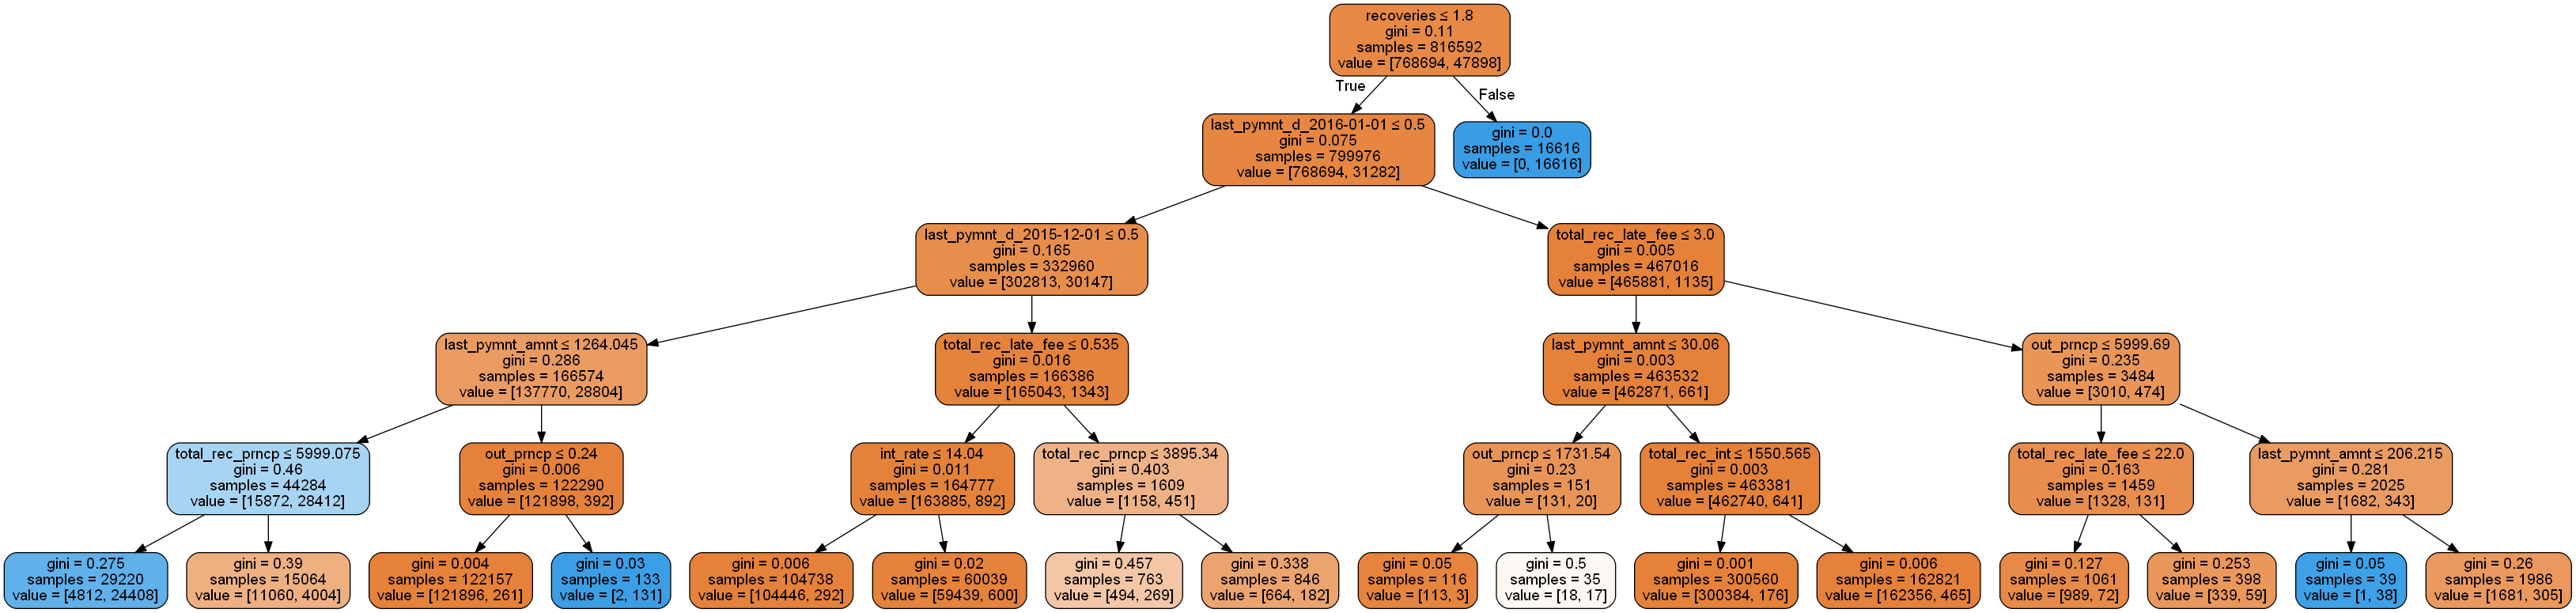

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot


dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True, feature_names = df_sig.drop('flag_bad_loan', axis =1).columns,
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [37]:
df_sig[df_sig.columns[:35]].columns.values

array(['term_ 36 months', 'term_ 60 months', 'sub_grade_A1',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype=object)

### Check Multi Colinnearity

###### First Iteration

In [38]:
# multikol antar kolom ( I )
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df_sig[df_sig.columns[:50]].values, 
                                 j) for j in range(df_sig[df_sig.columns[:50]].shape[1])]
vif_res = pd.Series(vif, index = df_sig[df_sig.columns[:50]].columns, name ='VIF')
vif_res

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [ ]:
vif_drop = []
for idx, val in zip(vif_res.index, vif_res):
    if val> 10:
        vif_drop.append(idx)

In [ ]:
vif_drop

In [ ]:
# multikol antar kolom ( II )
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_2= [variance_inflation_factor(df_sig[df_sig.columns[50:100]].values, 
                                 j) for j in range(df_sig[df_sig.columns[50:100]].shape[1])]
vif_res_2 = pd.Series(vif_2, index = df_sig[df_sig.columns[50:100]].columns, name ='VIF')
vif_res_2

In [ ]:
# multikol antar kolom ( III )
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_3= [variance_inflation_factor(df_sig[df_sig.columns[100:150]].values, 
                                 j) for j in range(df_sig[df_sig.columns[100:150]].shape[1])]
vif_res_3 = pd.Series(vif_3, index = df_sig[df_sig.columns[100:150]].columns, name ='VIF')
vif_res_3

In [ ]:
# multikol antar kolom ( IV )
vif_4= [variance_inflation_factor(df_sig[df_sig.columns[150:200]].values, 
                                 j) for j in range(df_sig[df_sig.columns[150:200]].shape[1])]
vif_res_4 = pd.Series(vif_4, index = df_sig[df_sig.columns[150:200]].columns, name ='VIF')
vif_res_4

In [ ]:
for idx, val in zip(vif_res_4.index, vif_res_4):
    if val> 10:
        vif_drop.append(idx)
vif_drop

In [ ]:
vif_5= [variance_inflation_factor(df_sig[df_sig.columns[200:267]].values, 
                                 j) for j in range(df_sig[df_sig.columns[200:267]].shape[1])]
vif_res_5 = pd.Series(vif_5, index = df_sig[df_sig.columns[200:267]].columns, name ='VIF')
vif_res_5

In [ ]:
for idx, val in zip(vif_res_5.index, vif_res_5):
    if val> 10:
        vif_drop.append(idx)

In [ ]:
pd.Series(vif_drop).unique()

In [ ]:
df_drop_col1 = df_sig.drop(columns = vif_drop)

In [ ]:
df_drop_col1.columns

###### Second Iteration

In [ ]:
#( B I )
vif_b1 = [variance_inflation_factor(df_drop_col1[df_drop_col1.columns[:75]].values, 
                                 j) for j in range(df_drop_col1[df_drop_col1.columns[:75]].shape[1])]
vif_res_b1 = pd.Series(vif_b1, index = df_drop_col1[df_drop_col1.columns[:75]].columns, name ='VIF')
vif_res_b1

In [ ]:
vif_drop_b1=[]
for idx, val in zip(vif_res_b1.index, vif_res_b1):
    if val> 10:
        vif_drop_b1.append(idx)
vif_drop_b1

In [ ]:
#( B 2 )
vif_b2 = [variance_inflation_factor(df_drop_col1[df_drop_col1.columns[76:150]].values, 
                                 j) for j in range(df_drop_col1[df_drop_col1.columns[76:150]].shape[1])]
vif_res_b2 = pd.Series(vif_b2, index = df_drop_col1[df_drop_col1.columns[76:150]].columns, name ='VIF')
vif_res_b2

In [ ]:
for idx, val in zip(vif_res_b2.index, vif_res_b2):
    if val> 10:
        vif_drop_b1.append(idx)
vif_drop_b1

In [ ]:
vif_b3 = [variance_inflation_factor(df_drop_col1[df_drop_col1.columns[150:218]].values, 
                                 j) for j in range(df_drop_col1[df_drop_col1.columns[150:218]].shape[1])]
vif_res_b3 = pd.Series(vif_b3, index = df_drop_col1[df_drop_col1.columns[150:218]].columns, name ='VIF')
vif_res_b3

In [ ]:
for idx, val in zip(vif_res_b3.index, vif_res_b3):
    if val> 10:
        vif_drop_b1.append(idx)
vif_drop_b1

In [ ]:
df_drop_col2 = df_drop_col1.drop(columns = vif_drop_b1)

###### Third Iteration

In [ ]:
vif_c1 = [variance_inflation_factor(df_drop_col2[df_drop_col2.columns[:105]].values, 
                                 j) for j in range(df_drop_col2[df_drop_col2.columns[:105]].shape[1])]
vif_res_c1 = pd.Series(vif_c1, index = df_drop_col2[df_drop_col2.columns[:105]].columns, name ='VIF')
vif_res_c1

In [ ]:
vif_drop_c1 = []
for idx, val in zip(vif_res_c1.index, vif_res_c1):
    if val> 10:
        vif_drop_c1.append(idx)
vif_drop_c1

In [ ]:
vif_c2 = [variance_inflation_factor(df_drop_col2[df_drop_col2.columns[105:211]].values, 
                                 j) for j in range(df_drop_col2[df_drop_col2.columns[105:211]].shape[1])]
vif_res_c2 = pd.Series(vif_c2, index = df_drop_col2[df_drop_col2.columns[105:211]].columns, name ='VIF')
vif_res_c2

In [ ]:
for idx, val in zip(vif_res_c2.index, vif_res_c2):
    if val> 10:
        vif_drop_c1.append(idx)
pd.Series(vif_drop_c1).unique()

In [ ]:
df_drop_col3 = df_drop_col2.drop(columns=vif_drop_c1)

In [ ]:
len(df_drop_col3.columns)

###### Fourth Iteration

In [ ]:
vif_d1 = [variance_inflation_factor(df_drop_col3.values, 
                                 j) for j in range(df_drop_col3.shape[1])]
vif_res_d1 = pd.Series(vif_d1, index = df_drop_col3.columns, name ='VIF')
vif_res_d1

In [ ]:
vif_drop_d1=[]
for idx, val in zip(vif_res_d1.index, vif_res_d1):
    if val> 10:
        vif_drop_d1.append(idx)
pd.Series(vif_drop_d1).unique()

In [ ]:
df_drop_col4 = df_drop_col3.drop(columns=vif_drop_d1)

In [ ]:
len(df_drop_col4.columns)

###### Get Multicoll-less Data

In [ ]:
df_drop_col4.to_csv(r'C:\Users\User\Documents\Latihan Purwadhika\Project Akhir\Finance or Bank\887 r x 74 c\cleanVIF_loan_test4.csv', index=False, header=True)

In [ ]:
df_drop_col4.head()

In [ ]:
df_cleancoll = df_drop_col4.copy()

In [ ]:
#df_sig.drop(vif_drop, axis = 1, inplace =True)

In [5]:
df['recoveries'].value_counts()

0.00       799976
200.00          8
800.00          8
100.00          7
3000.00         6
            ...  
484.40          1
377.96          1
1005.64         1
2256.15         1
1705.70         1
Name: recoveries, Length: 15923, dtype: int64

In [6]:
df['recoveries'].value_counts()

0.00       799976
200.00          8
800.00          8
100.00          7
3000.00         6
            ...  
484.40          1
377.96          1
1005.64         1
2256.15         1
1705.70         1
Name: recoveries, Length: 15923, dtype: int64

In [7]:
df['collection_recovery_fee'].value_counts()

0.0000      800378
18.0000          6
216.0000         5
450.0000         5
144.0000         5
             ...  
5.6301           1
4.0268           1
17.6627          1
78.5664          1
543.1878         1
Name: collection_recovery_fee, Length: 15950, dtype: int64

In [8]:
df['last_pymnt_amnt'].value_counts()

0.00        17407
327.34       2094
318.79       1789
312.86       1449
392.81       1400
            ...  
2384.46         1
5842.03         1
11004.35        1
7764.27         1
3412.85         1
Name: last_pymnt_amnt, Length: 199118, dtype: int64